<h1><u><center> Economic Scenario Generator Project - Projet DDEFI </center></u></h1>
<center><img src = "https://www.econostrum.info/photo/art/grande/36648656-32651177.jpg?v=1566465679" 
     title = "NASDAQ Logo" alt = "Nasdaq Logo" width="300"><center>

<h3><center> Simon Evanno  / Viviane Feng / Basile Hogenmuller / Khaoula Lamtouni / Basma Bazi </center></h3>

<h4><center> - </h4></center>
<h4><center> École Centrale Marseille </h4></center>

# Import

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import random
from timeseries import TimeSeries

Generate data done


In [3]:
path_data = 'datas/'
exchange_rates_path = 'exchange_rates_ecb_eur_updated_2023.csv'

dftaux = pd.read_csv(filepath_or_buffer = path_data + exchange_rates_path, 
                     sep = '\t')
dftaux['Date'] = pd.to_datetime(dftaux['Date'], format='%Y-%m-%d', utc=True).dt.date

dfCAC40 = pd.read_csv(filepath_or_buffer = path_data + '^FCHI.csv',
                        sep = ',')
dfCAC40['Date'] = pd.to_datetime(dfCAC40['Date'], format='%Y-%m-%d', utc=True).dt.date
dfCAC40.set_index(keys=pd.DatetimeIndex(dfCAC40['Date']), inplace=False)
dfCAC40 = dfCAC40.rename(columns={'Close': 'CAC40'})

dfSP = pd.read_csv(filepath_or_buffer = path_data + '^GSPC.csv',
                        sep = ',')
dfSP['Date'] = pd.to_datetime(dfSP['Date'], format='%Y-%m-%d', utc=True).dt.date
dfSP.set_index(keys=pd.DatetimeIndex(dfSP['Date']), inplace=False)
dfSP = dfSP.rename(columns={'Close': 'SP500'})

dfEUS = pd.read_csv(filepath_or_buffer = path_data + '^STOXX50E.csv',
                        sep = ',')
dfEUS['Date'] = pd.to_datetime(dfEUS['Date'], format='%Y-%m-%d', utc=True).dt.date
dfEUS.set_index(keys=pd.DatetimeIndex(dfEUS['Date']), inplace=False)
dfEUS = dfEUS.rename(columns={'Close': 'EURSTOXX50'})

# merge the dataframes
dftaux = pd.merge(dfCAC40, dftaux, on='Date')
dftaux = pd.merge(dfEUS, dftaux, on='Date')
dftaux = pd.merge(dfSP, dftaux, on='Date')

dftaux

Date        SP500   EURSTOXX50        CAC40     USD     JPY  \
0     2007-03-29  1422.530029  4181.029785  5634.160156  1.3352  156.75   
1     2007-04-02  1424.550049  4246.299805  5711.910156  1.3366  157.35   
2     2007-04-03  1437.770020  4261.830078  5739.009766  1.3358  158.53   
3     2007-04-04  1439.369995  4271.540039  5741.379883  1.3352  158.70   
4     2007-04-10  1448.390015  4293.200195  5751.919922  1.3426  160.05   
...          ...          ...          ...          ...     ...     ...   
3016  2022-10-18  3719.979980  3471.239990  6040.720215  0.9835  146.65   
3017  2022-10-19  3695.159912  3492.850098  6086.899902  0.9778  146.34   
3018  2022-10-20  3665.780029  3476.629883  6035.390137  0.9811  146.99   
3019  2022-10-24  3797.340088  3585.580078  6250.549805  0.9851  146.76   
3020  2022-10-25  3859.110107  3605.310059  6276.310059  0.9861  146.84   

         BGN     CZK     DKK      GBP  ...     ILS      INR      KRW      MXN  \
0     1.9558  28.035  7.4499  0.67930  ...     NaN      NaN  1256.22      NaN   
1     1.9558  27.940  7.4503  0.67610  ...     NaN      NaN  1252.86      NaN   
2     1.9558  28.011  7.4514  0.67610  ...     NaN      NaN  1251.31      NaN   
3     1.9558  27.933  7.4540  0.67665  ...     NaN      NaN  1250.21      NaN   
4     1.9558  27.950  7.4560  0.68030  ...     NaN      NaN  1254.32      NaN   
...      ...     ...     ...      ...  ...     ...      ...      ...      ...   
3016  1.9558  24.593  7.4393  0.86928  ...  3.4640  80.9195  1400.92  19.6640   
3017  1.9558  24.563  7.4390  0.86993  ...  3.4628  81.1955  1398.35  19.6845   
3018  1.9558  24.525  7.4389  0.87258  ...  3.4754  81.1755  1400.30  19.7005   
3019  1.9558  24.482  7.4385  0.87070  ...  3.4997  81.5451  1418.40  19.6514   
3020  1.9558  24.472  7.4387  0.87143  ...  3.5060  81.6530  1417.50  19.6353   

         MYR     NZD     PHP     SGD     THB      ZAR  
0     4.6124  1.8713  64.357  2.0274  43.160   9.7745  
1     4.6240  1.8571  64.651  2.0292  43.348   9.7127  
2     4.6225  1.8538  64.018  2.0285  43.422   9.6420  
3     4.6158  1.8590  63.889  2.0224  43.305   9.5879  
4     4.6279  1.8471  64.317  2.0384  43.834   9.5828  
...      ...     ...     ...     ...     ...      ...  
3016  4.6382  1.7251  57.897  1.3963  37.422  17.7904  
3017  4.6152  1.7264  57.741  1.3931  37.469  17.8339  
3018  4.6396  1.7206  57.742  1.3959  37.360  17.9106  
3019  4.6674  1.7343  58.021  1.4008  37.600  18.0625  
3020  4.6697  1.7321  57.988  1.4050  37.758  18.2211  

[3021 rows x 36 columns]

# Initialisation of the multi timeseries

For our analysis, we take 4 currencies:
- USD
- JPY
- GBP
- CHF

In [4]:
symbols = ['USD', 'JPY', 'GBP', 'CAD', 'CAC40', 'SP500', 'EURSTOXX50']

random.seed(14021999)

ts = TimeSeries(dftaux, symbols)
ts.pre_processing(method_return='logarithmic')

# Analysis of the timeseries

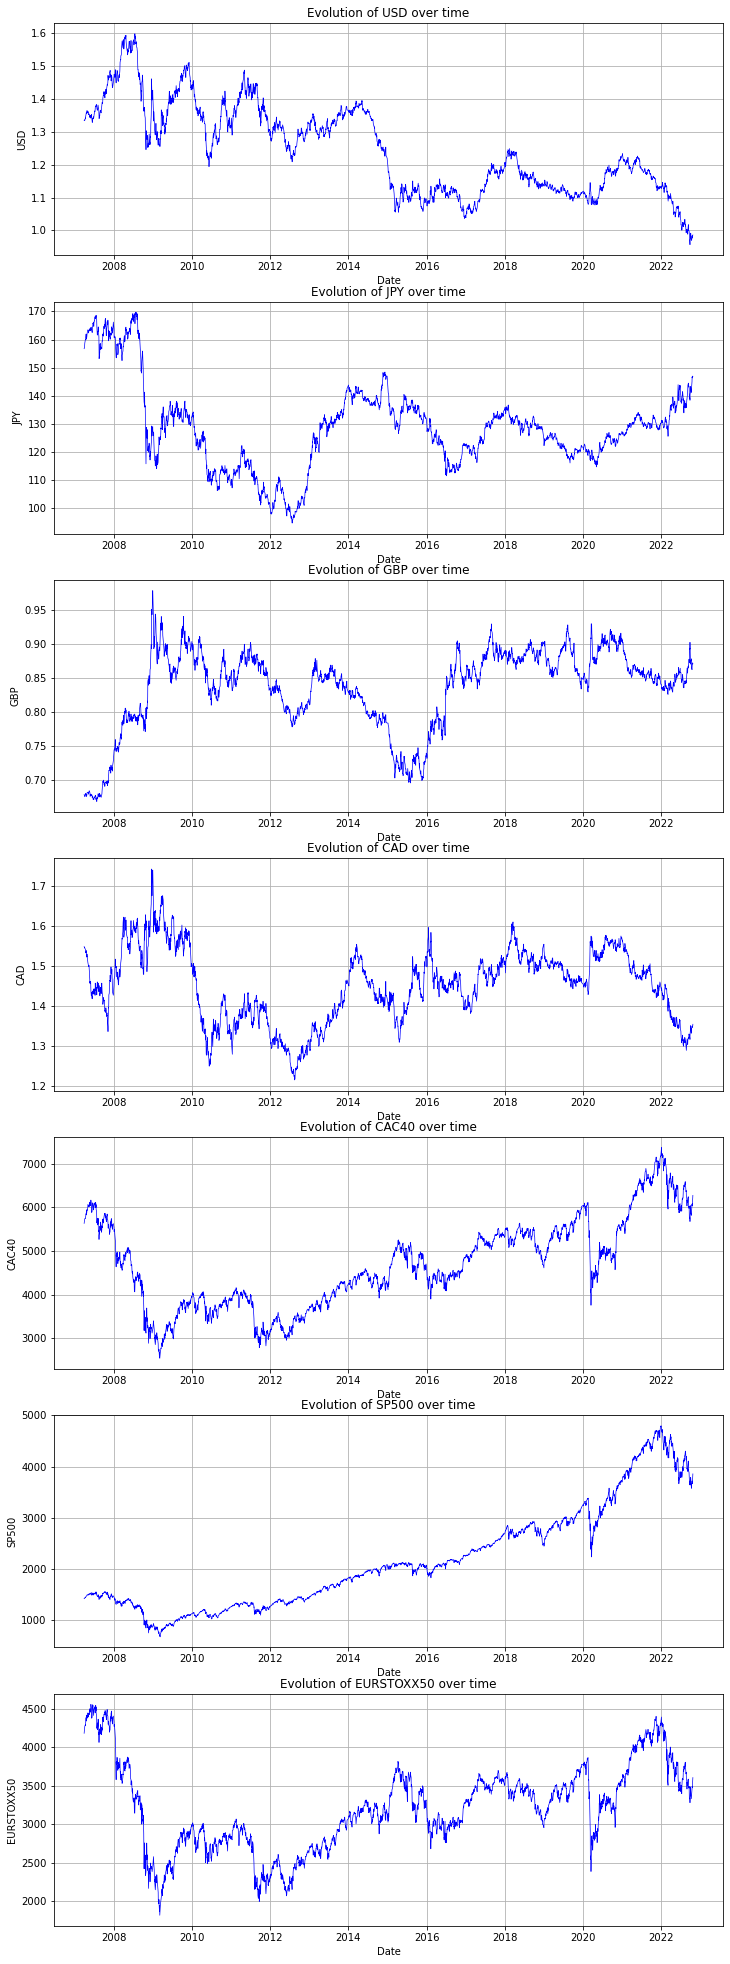

In [5]:
ts.plot(type_plot='rates')

On this plots we can see the evolution of the exchange rate between EUR-USD, EUR-JPY, EUR-GBP, EUR-CHF.

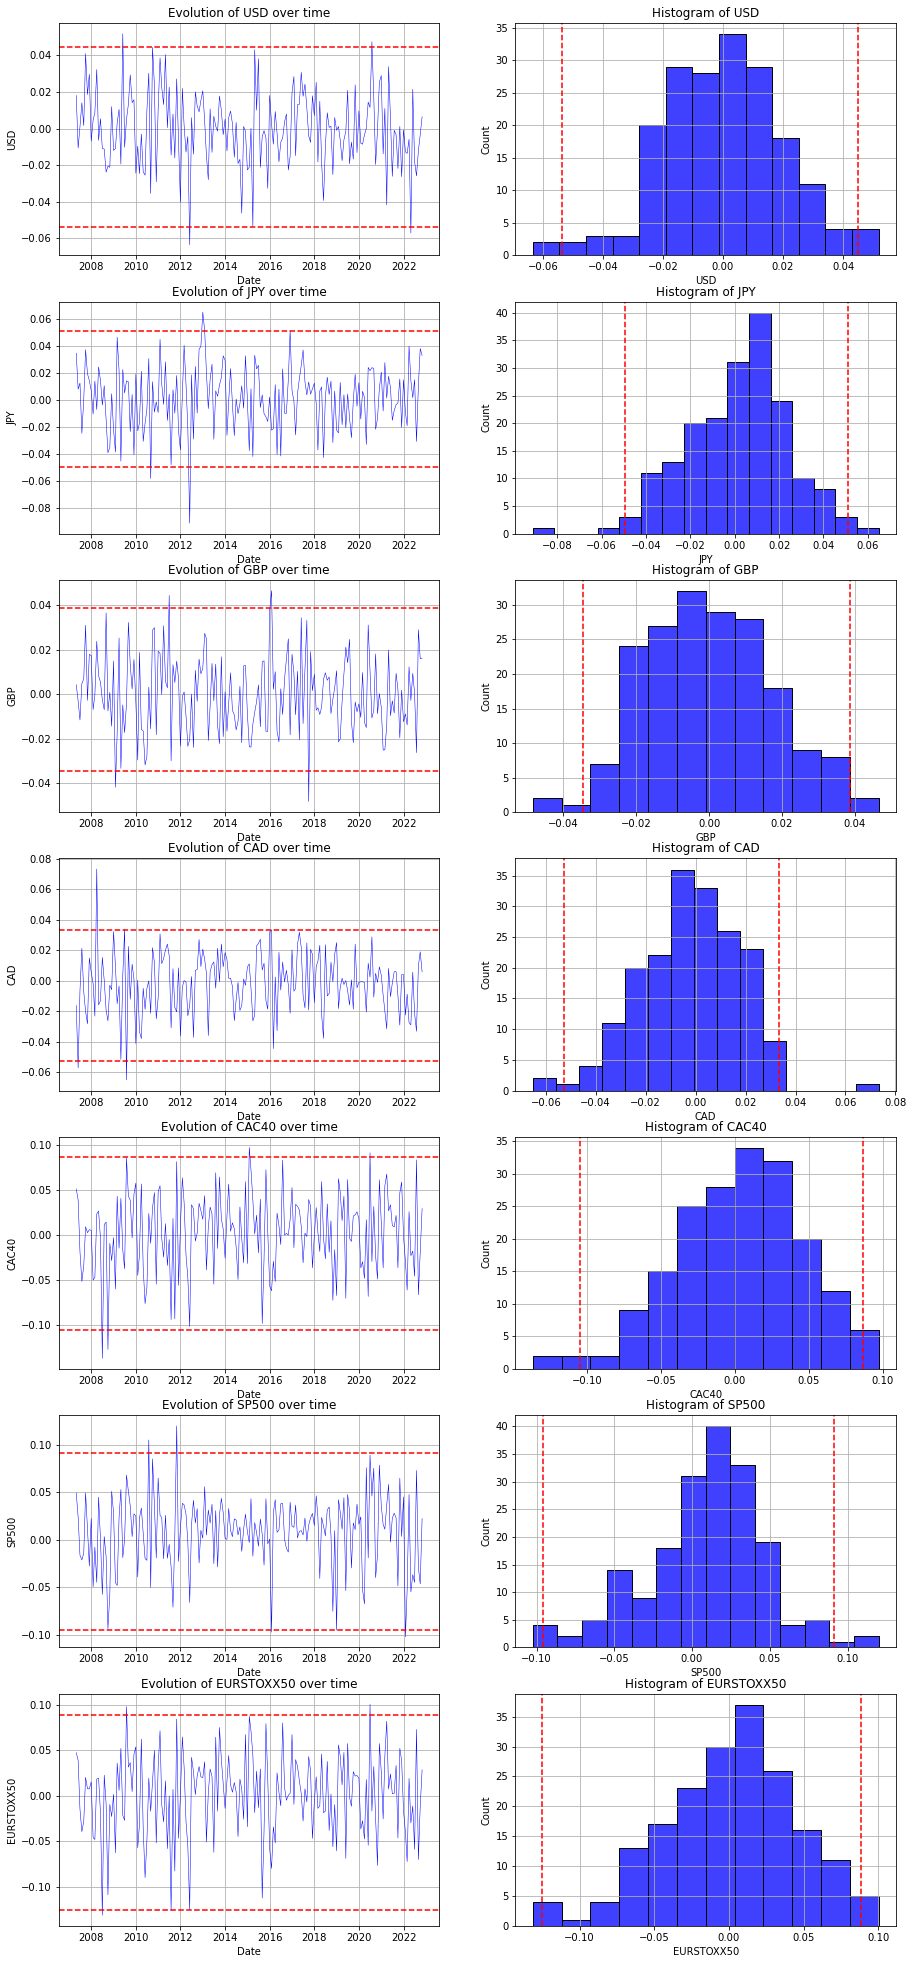

In [6]:
ts.plot(type_plot='returns', frequency="monthly")


On these graphs we can see the evolution of exchange rate returns as well as the 95% quantiles plotted in red. Moreover, we notice that the returns are similar to a normal law with all an average close to 0.

In [7]:
ts.statistics()

USD       JPY       GBP       CAD     CAC40     SP500  \
Skewness     -0.205964 -0.249031  0.112353 -0.015492 -0.216056 -0.541671   
Kurtosis      3.601866  3.851436  3.460202  3.521844  3.931823  4.985474   
Normality        False     False     False     False     False     False   
Stationarity      True      True      True      True      True      True   

             EURSTOXX50  
Skewness      -0.207739  
Kurtosis       3.892521  
Normality         False  
Stationarity       True

stationarity -> bootstrap

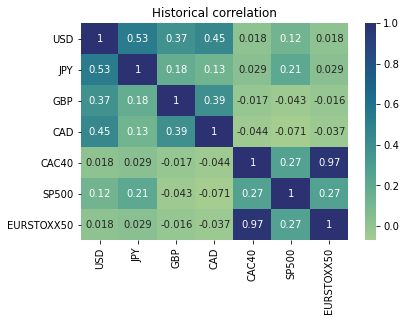

In [8]:
ts.correlation()


On this correlation matrix, we notice that some exchange rates are more correlated than others. For example EUR-USD and EUR-JPY have a correlation equal to 0.52 while EUR-USD and EUR-CHF have a correlation equal to 0.14. This matrix will allow us to see if our economic scenario generators maintain this correlation between exchange rates.

# Bootstrap method

## Explanation

Statistics science is based on learning from data. Statistical methods are therefore essential to make decisions and predictions while the situation already occured.
The traditional approach (or large sample approach) consists of drawing one sample of size n from the data and that sample is used to calculate the data estimated to make inferences on. But this method tends to take into account outliers.
In order to tackle this issue, the bootstrapping method is a statistical procedure that resamples a single data to create many simulated samples. In our case, we are considering the past datas of each currency and we draw randomly as many as returns we need for each scenarios (for example : 100).

The block samples are chosen randomly to create bootstrap resamples, there are several ways to choose these blocks :
- Simple block bootstrap: we choose from blocks of a fixed length, delta_block.
- Moving block bootstrap: slightly more complicated since it allows to overlap of the blocks.

## Daily frequency

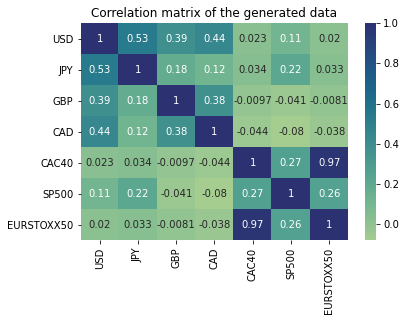

Correlation done
Quantiles done


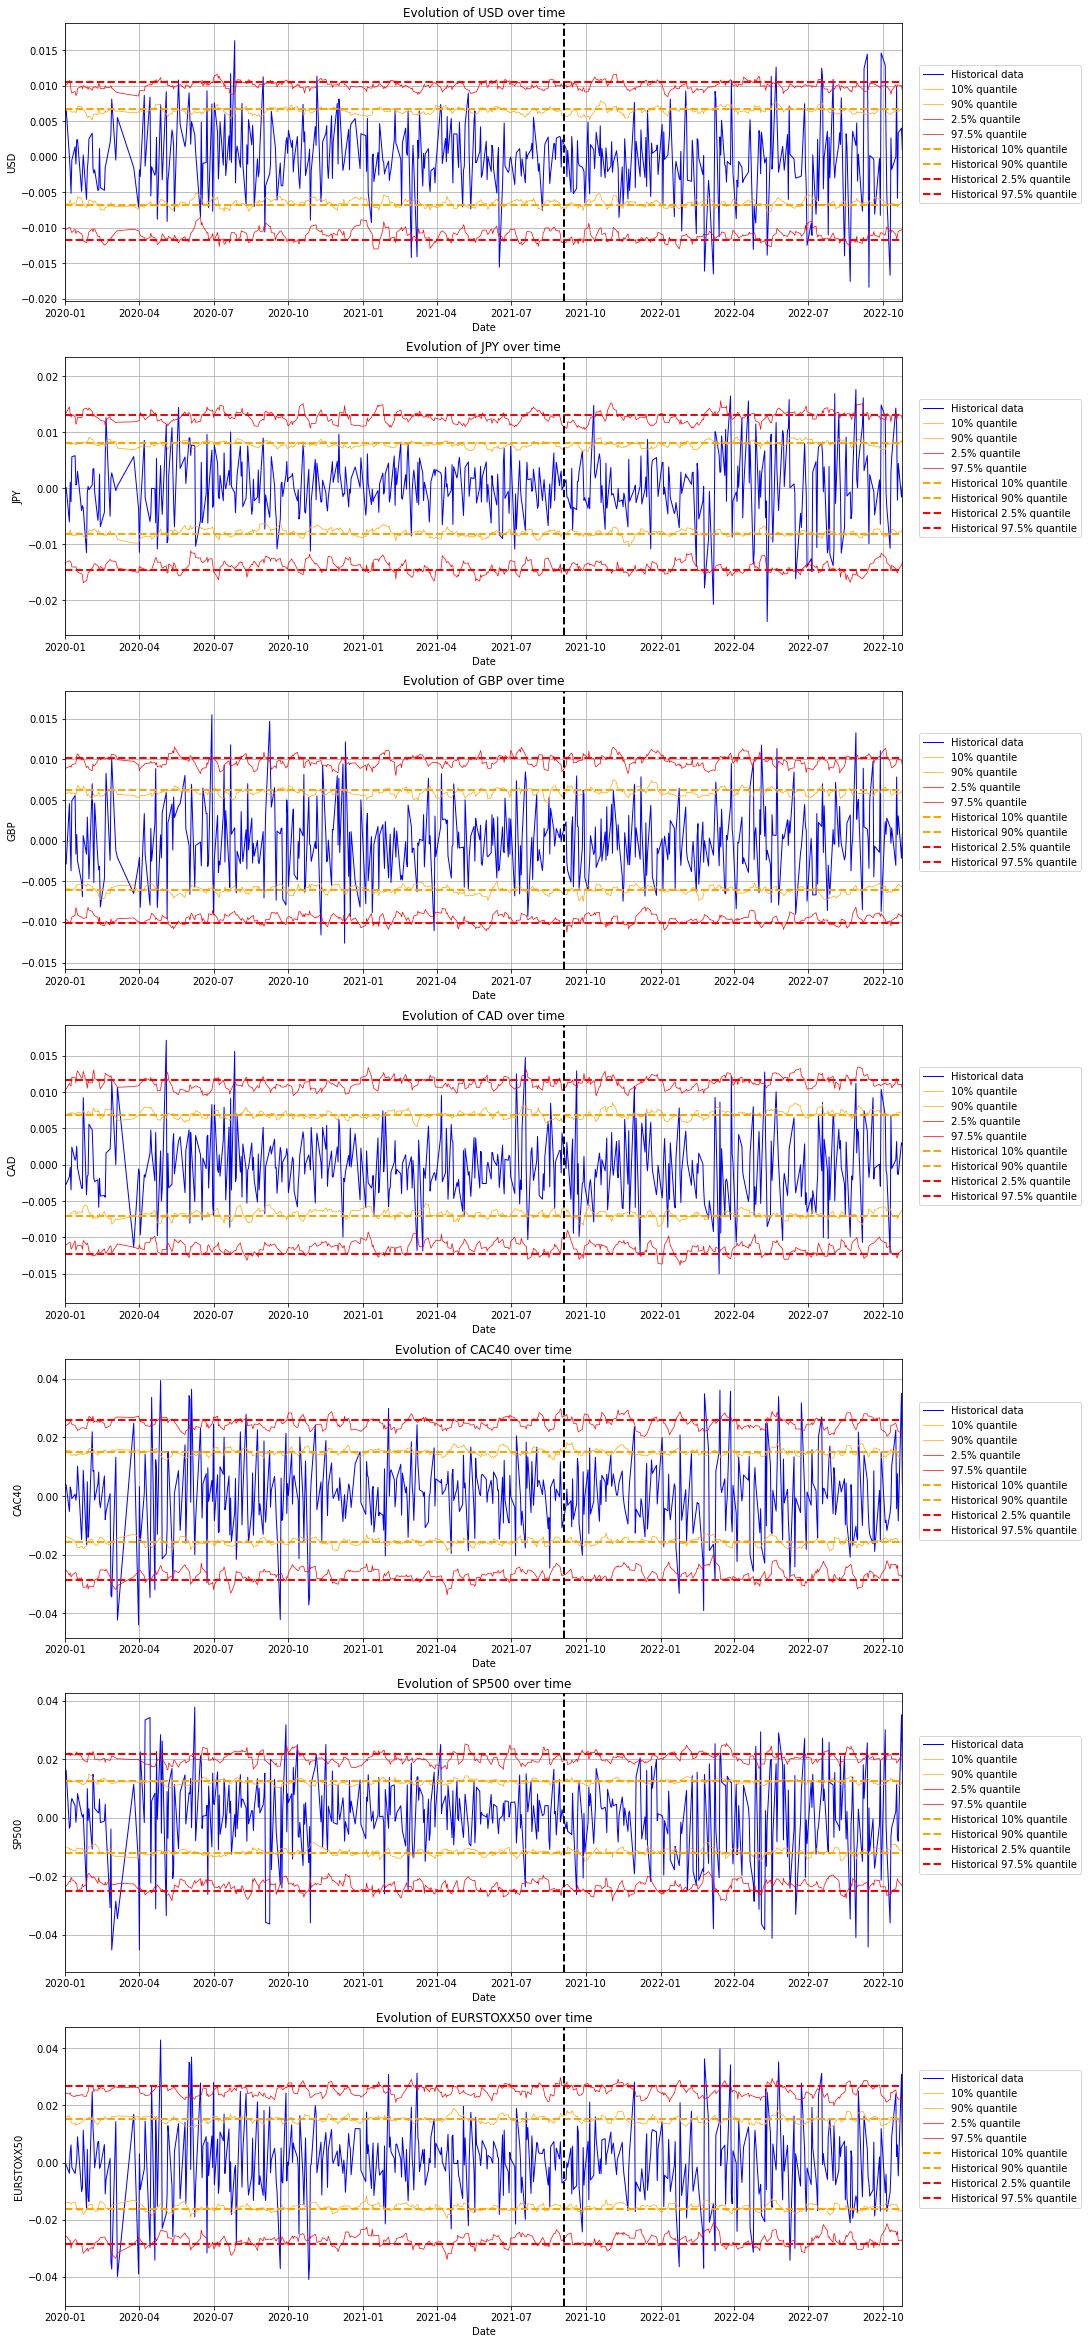

         Bootstrap
train     0.022704
generate  0.033964


In [9]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 100
ts.bootstrap_esg(scenarios=scenarios, test_date=test_dates, plot_from=plot_from)

## Weekly frequency

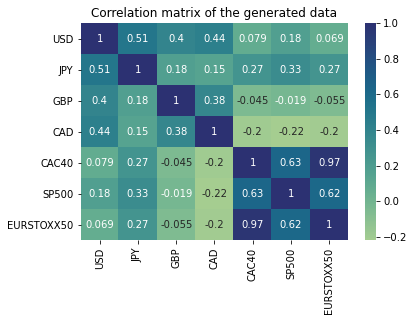

Correlation done
Quantiles done


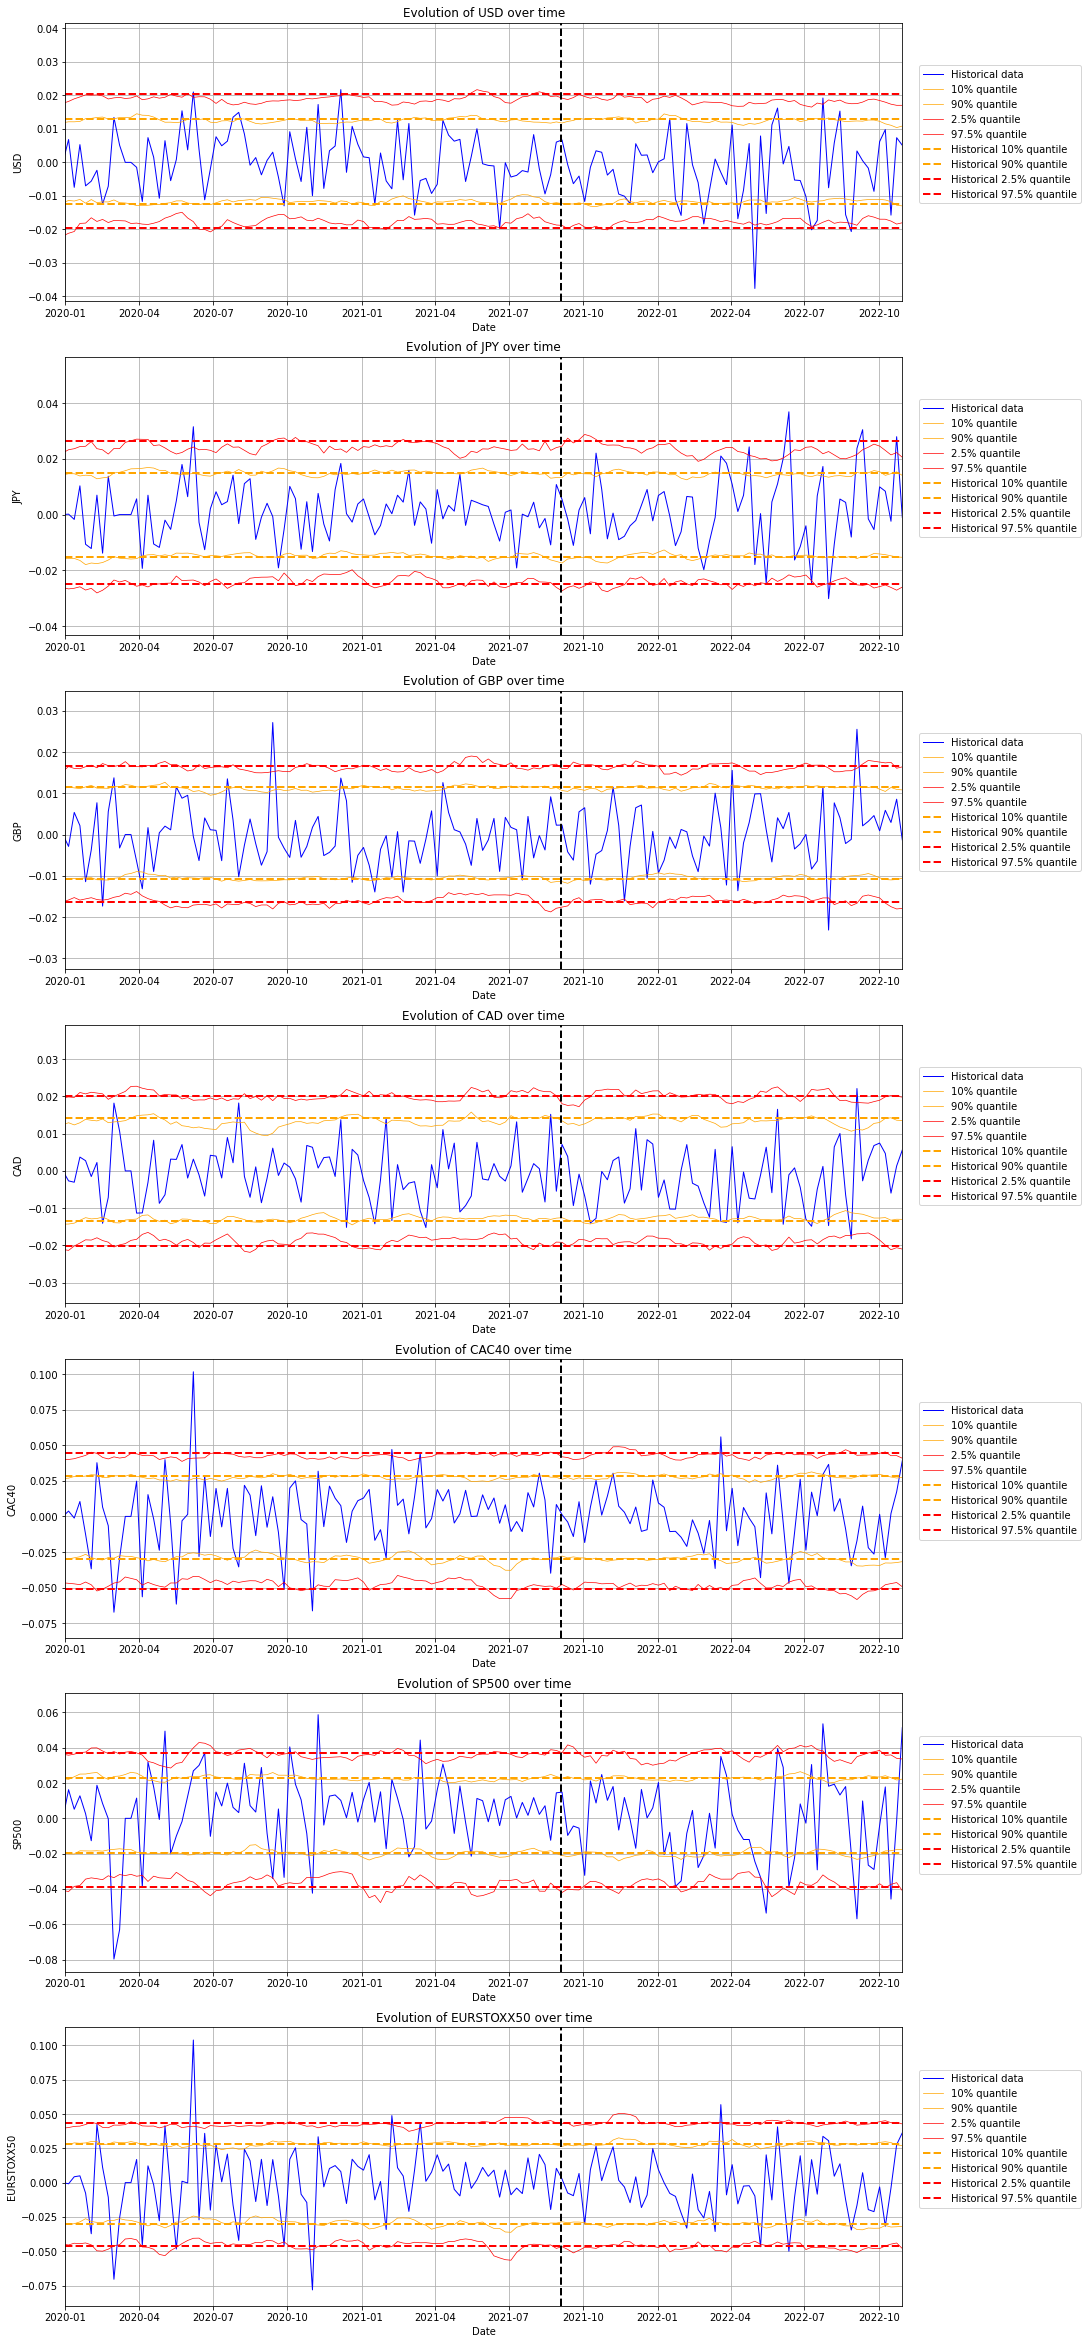

         Bootstrap
train     0.076756
generate  0.038456


In [10]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 100
frequency = 'weekly'
ts.bootstrap_esg(scenarios=scenarios, test_date=test_dates, plot_from=plot_from, frequency=frequency)

## Monthly frequency

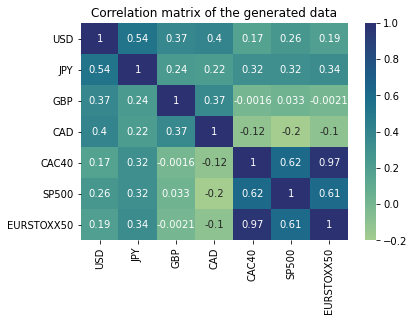

Correlation done
Quantiles done


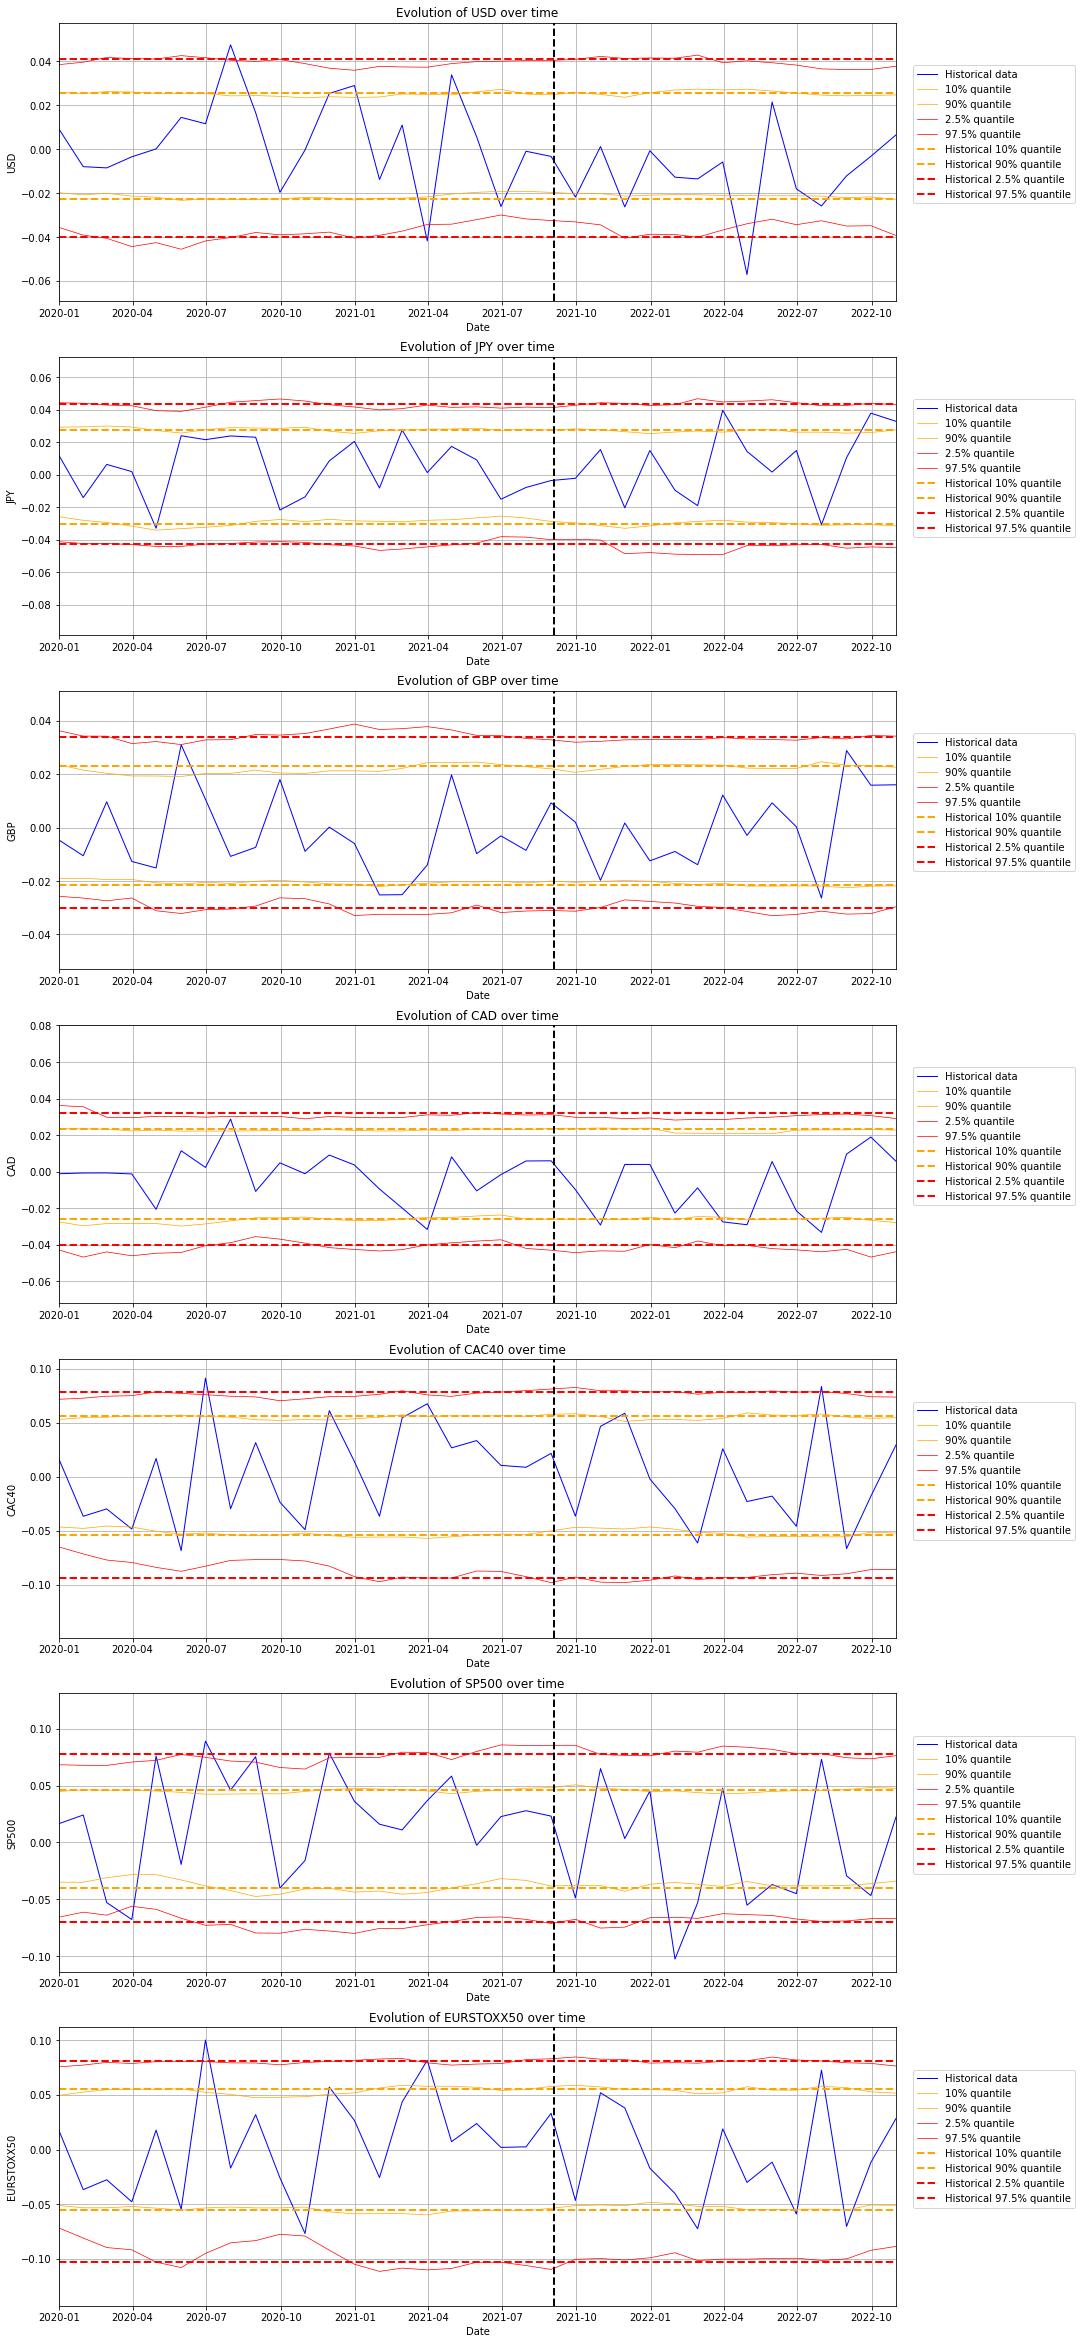

         Bootstrap
train     0.014075
generate  0.033674


In [11]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 100
frequency = 'monthly'
ts.bootstrap_esg(scenarios=scenarios, test_date=test_dates, plot_from=plot_from, frequency=frequency)

## Annual frequency

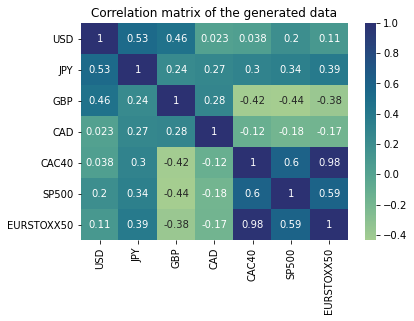

Correlation done
Quantiles done


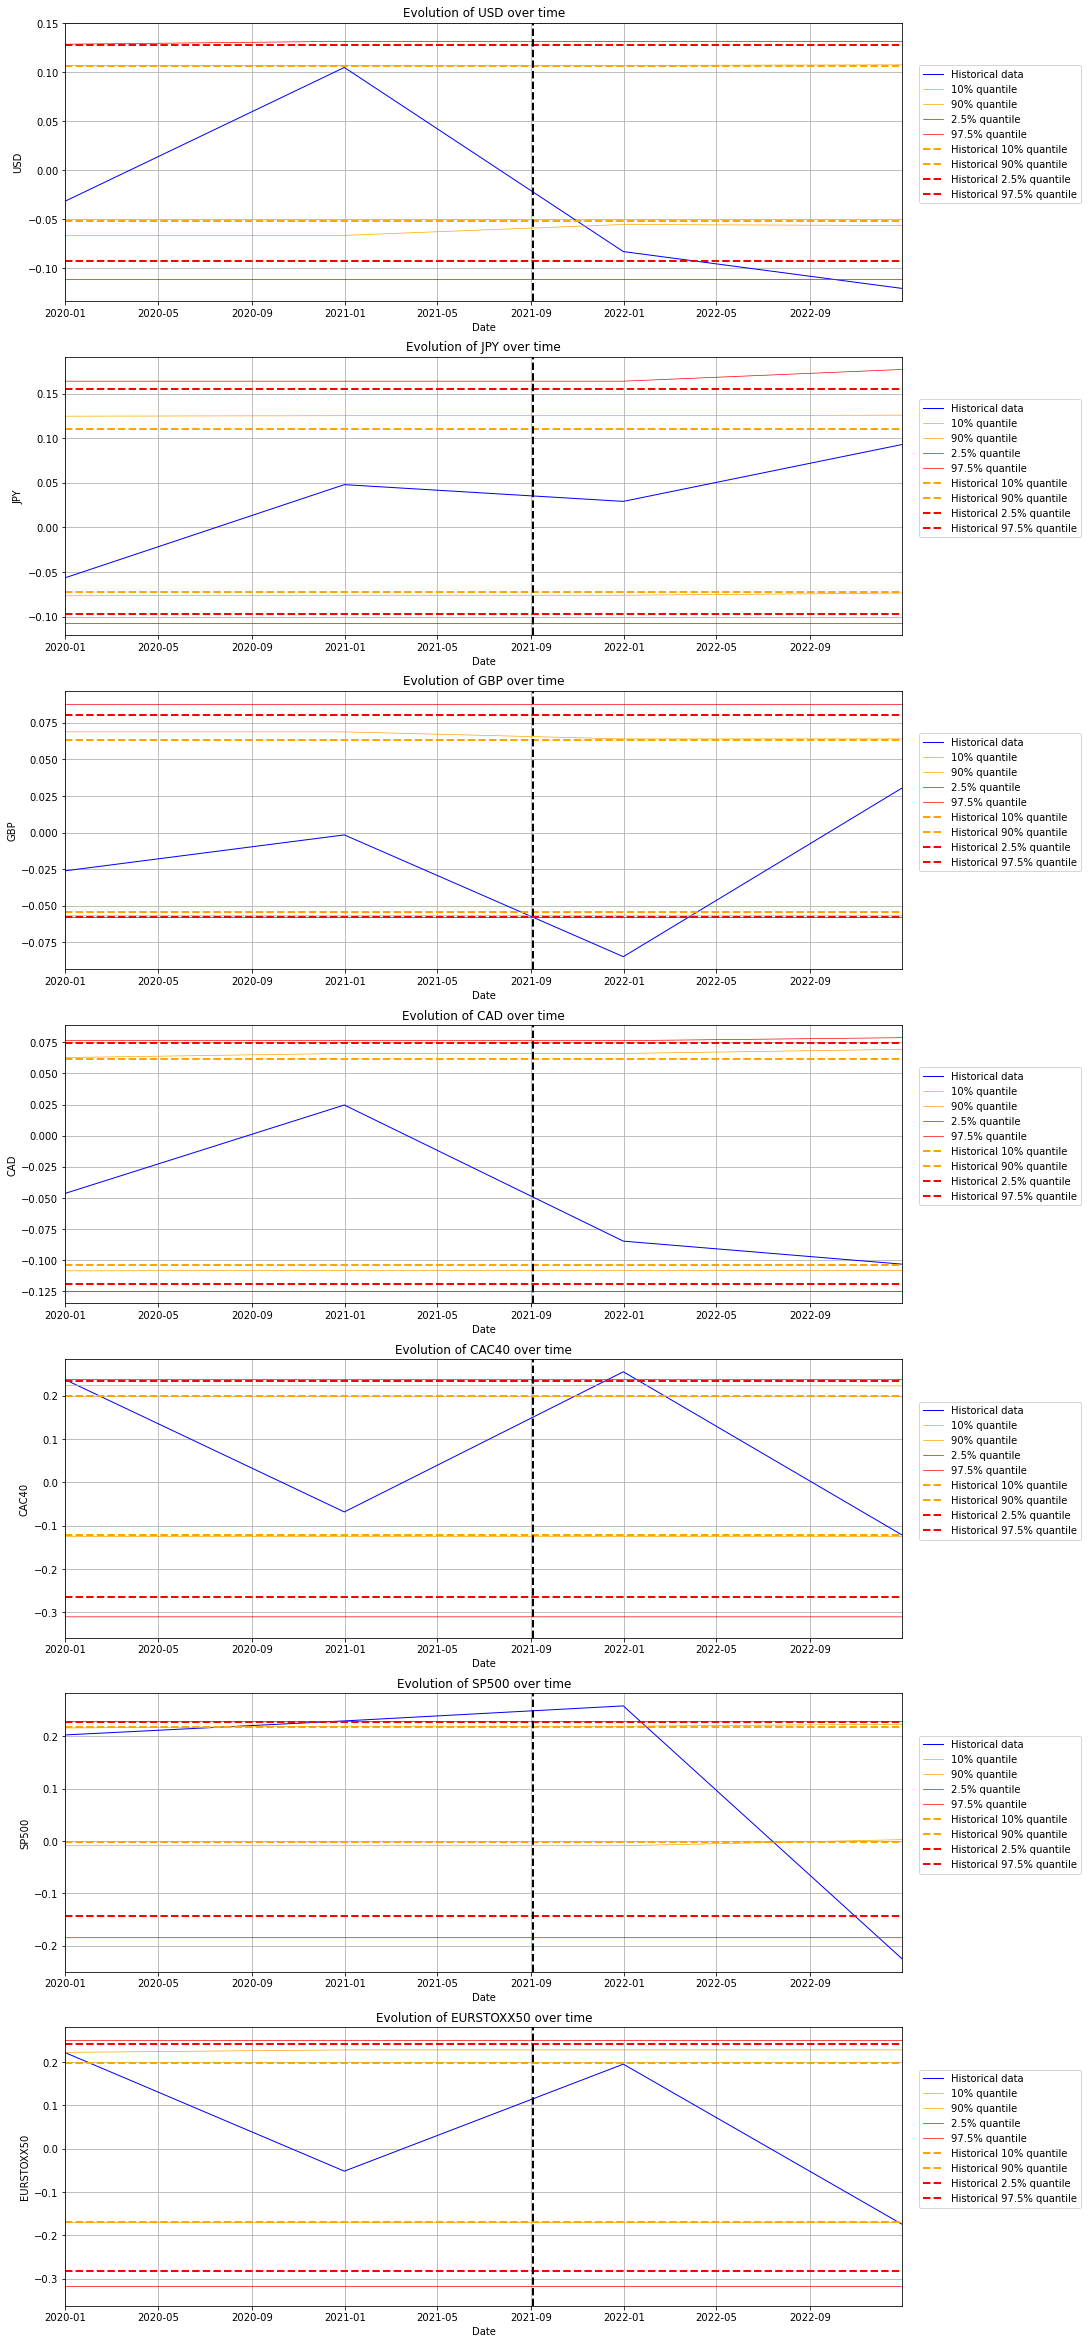

         Bootstrap
train     0.014205
generate  0.037185


In [12]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 100
frequency = 'annualy'
ts.bootstrap_esg(scenarios=scenarios, test_date=test_dates, plot_from=plot_from, frequency=frequency)

# RBM

## Explanation

A Restricted Boltzmann Machine is a two-layer network with stochastic activation units. Restricted means that there is no connection between units whithin the same layer. The layer which is exposed to the training data set is called the visible layer. Inputs from the visible layer flow through the network (forward pass) to the hidden layer. 

Each hidden unit then ”fires” randomly − its output is a Bernoulli random variable: ”1” is generated with probability p, which is equal to the sigmoid activation function value, and ”0” is generated with probability 1 − p. The outputs from the hidden layer then flow back (backward pass) to the visible layer, where they are aggregated and added to the visible layer biases.

The network learns the joint distribution of the configurations of visible and hidden activation units by trying to reconstruct the inputs from the training data set (visible unit values) by finding an optimal set of the network weights and biases

Here is a schema to visualize hidden and visible units.

![picture](https://drive.google.com/uc?id=1S5XYgEAKr2hpbdkNJJXj0R-XMST_6t3E)

Let's explain how RBM mathematicaly works :

Let's take a Bernoulli RBM with N stochastic binary visible units and M stochastic binary hidden units. $v = (v_{1}, ..., v_{N}$) and $h = (h_{1}, ..., h_{M}$) respectively, configurations of the visible and hidden units. The joint configuration of the visible and hidden units has the following energy :

$$
E(v,h) = -\sum_{i=1}^{N}a_{i}v_{i}-\sum_{j=1}^{M}b_{j}h_{j}-\sum_{i=1}^{N}\sum_{j=1}^{M}w_{i,j}v_{i}h_{j}
$$

Then we can define the joint probability :

$$
p(v,h) = \frac{1}{Z}e^{-E(v,h)}
$$

Z is defined by :

$$
Z = \sum_{v,h}e^{-E(v,h)}
$$

By using the total probability formula we obtain the probability of the visible and the hidden states:

$$
p(v) = \frac{1}{Z}\sum_{h}e^{-E(v,h)}, \qquad p(h) = \frac{1}{Z}\sum_{v}e^{-E(v,h)}
$$

The network is trained through the updates of weights and biases which increase the log probability of a training vector. We can obtain the sensitivities of the log probability of the training vector with respect to the weights and biases by computing the following expressions:

$$
\frac{\partial p(v)}{\partial w_{ij}}, \qquad \frac{\partial p(v)}{\partial a_{i}}, \qquad \frac{\partial p(v)}{\partial b_{j}}
$$

Then we obtain the weights and biases updates by the following expressions:

\begin{align*}
  \Delta w_{ij} &= \mu ( \langle v_{i}h_{j} \rangle_{data}-\langle v_{i}h_{j} \rangle_{model}), \\
  \Delta a_{i} &= \mu ( \langle v_{i} \rangle_{data}-\langle v_{i} \rangle_{model}), \\
  \Delta b_{j} &= \mu ( \langle h_{j} \rangle_{data}-\langle h_{j} \rangle_{model})
\end{align*}

With $\langle ... \rangle$ the expectation under the distribution specified by the subscript and $\mu$ the learning rate. We can get an unbiased estimator of $\langle v_{i}h_{j} \rangle_{data}$ with $\sigma (x)$ the following logistic sigmoid activation function :

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

Then, the binary state $h_{j}$ of the hidden unit j is set to 1 with probability given the training vector $\textbf{v}$:

$$
p(h_{j}=1|\textbf{v}) = \sigma (b_{j}+\sum_{i=1}^{N}v_{i}w_{ij})
$$

The binary state $v_{i}$ of the visible unit i is set to 1 with probability given the hidden vector $\textbf{h}$

$$
p(v_{i}=1 | \textbf{h}) = \sigma (a_{i}+\sum_{j=1}^{M}h_{j}w_{ij})
$$

Then to implement it we will use the following encoding and unencoding algorithm :

![picture](https://drive.google.com/uc?id=1muWgQuhY8WO_czNH8RoE2eHy_RkCwI8n)

And here is the k-step contrastive divergence algorithm we used in our RBM algorithm. The learning works on a number of epochs. During all epochs, we will data sequentially. For each epoch we will browse the data by batch (10 in our case). Then each batch will be used to update k times the units of each layer. (k=1 in our case)

![picture](https://drive.google.com/uc?id=1th8acOONFpG1yOxuvZIUZEMh4ezdil_6)

## RBM simple on a mix gaussian distribution

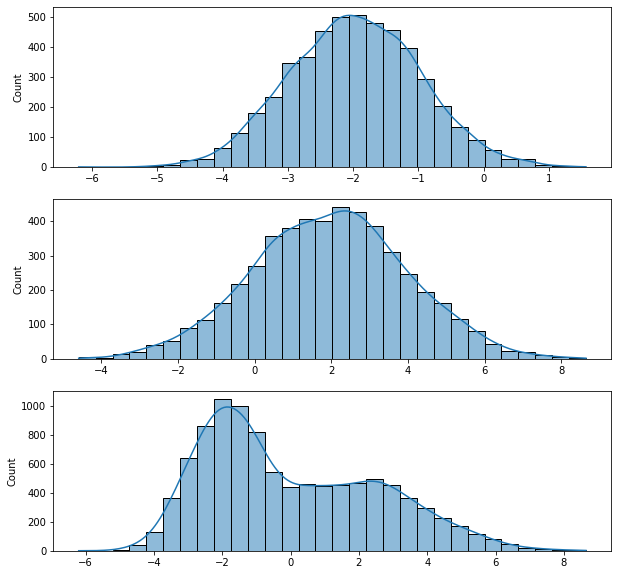

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

s1 = np.random.normal(loc=-2, scale=1, size=5000)
s2 = np.random.normal(loc=2, scale=2, size=5000)
st = np.concatenate((s1,s2))
np.random.shuffle(st)
np.random.shuffle(st)
np.random.shuffle(st)

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
sns.histplot(s1,bins=30,kde=True,ax=axes[0])
sns.histplot(s2,bins=30,kde=True,ax=axes[1])
sns.histplot(st,bins=30,kde=True,ax=axes[2])

Avec peu d'entrainemtn K=2000

Generate data done
min: -6.20633970211444, max: 8.648584511449776
mse: 1.718090510913004e-08


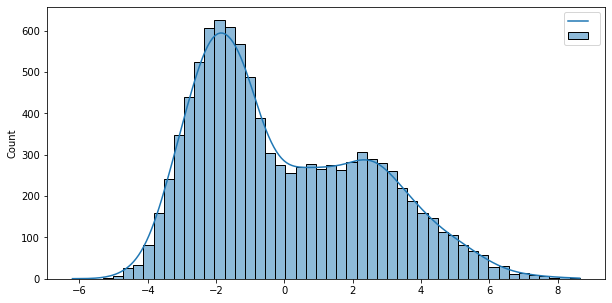

mse: 2.9752: 100%|██████████| 2000/2000 [00:17<00:00, 115.60it/s]


Training time: 18.372525215148926s


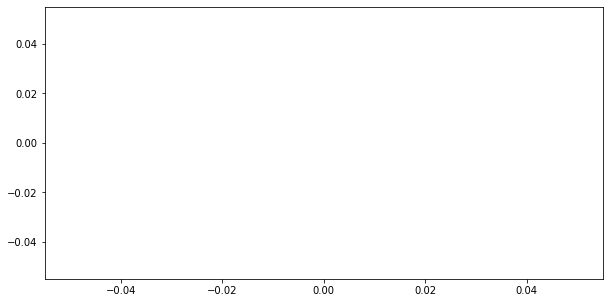

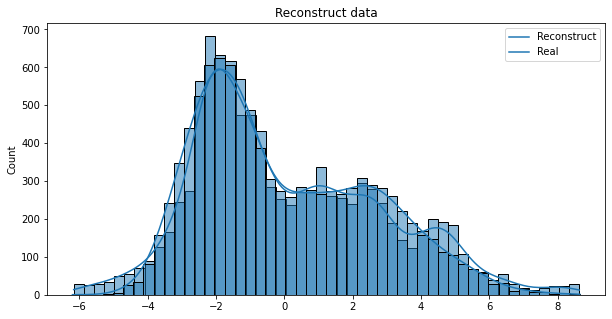

<Figure size 720x360 with 0 Axes>

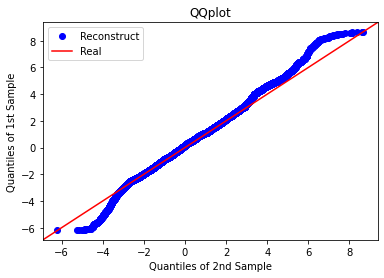

In [ ]:
from EconomicScenariosGenerator.rbm import RBM_simple
rbm = RBM_simple(st, 16, 12)
rbm.pre_processing()  
rbm.train(K=2000, batch_size=10, k_steps=1, lr=0.025, verbose=True)

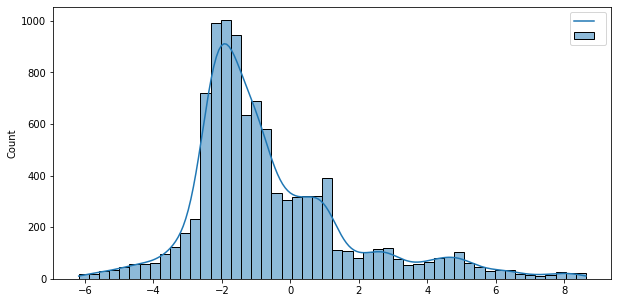

<Figure size 720x360 with 0 Axes>

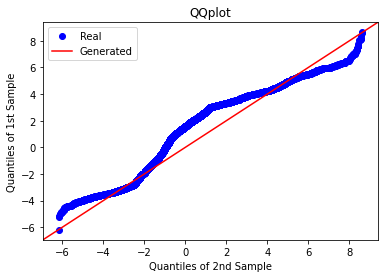

In [ ]:
rbm.generate_data(10000, 0, 1)

## RBM method

### Daily frequency

In [13]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 10
epochs = 10000
lr = 0.015
windows = 5
K = 150 # for the generation of sample
ts.rbm_esg(scenarios, epochs, lr, K, test_dates, plot_from, windows, parallel=True)

  0%|          | 6/10000 [00:00<03:03, 54.60it/s]

Pre-processing done


  4%|▍         | 407/10000 [00:05<02:03, 77.99it/s]


KeyboardInterrupt: 

### Weekly frequency

Pre-processing done


100%|██████████| 7000/7000 [00:45<00:00, 153.97it/s]


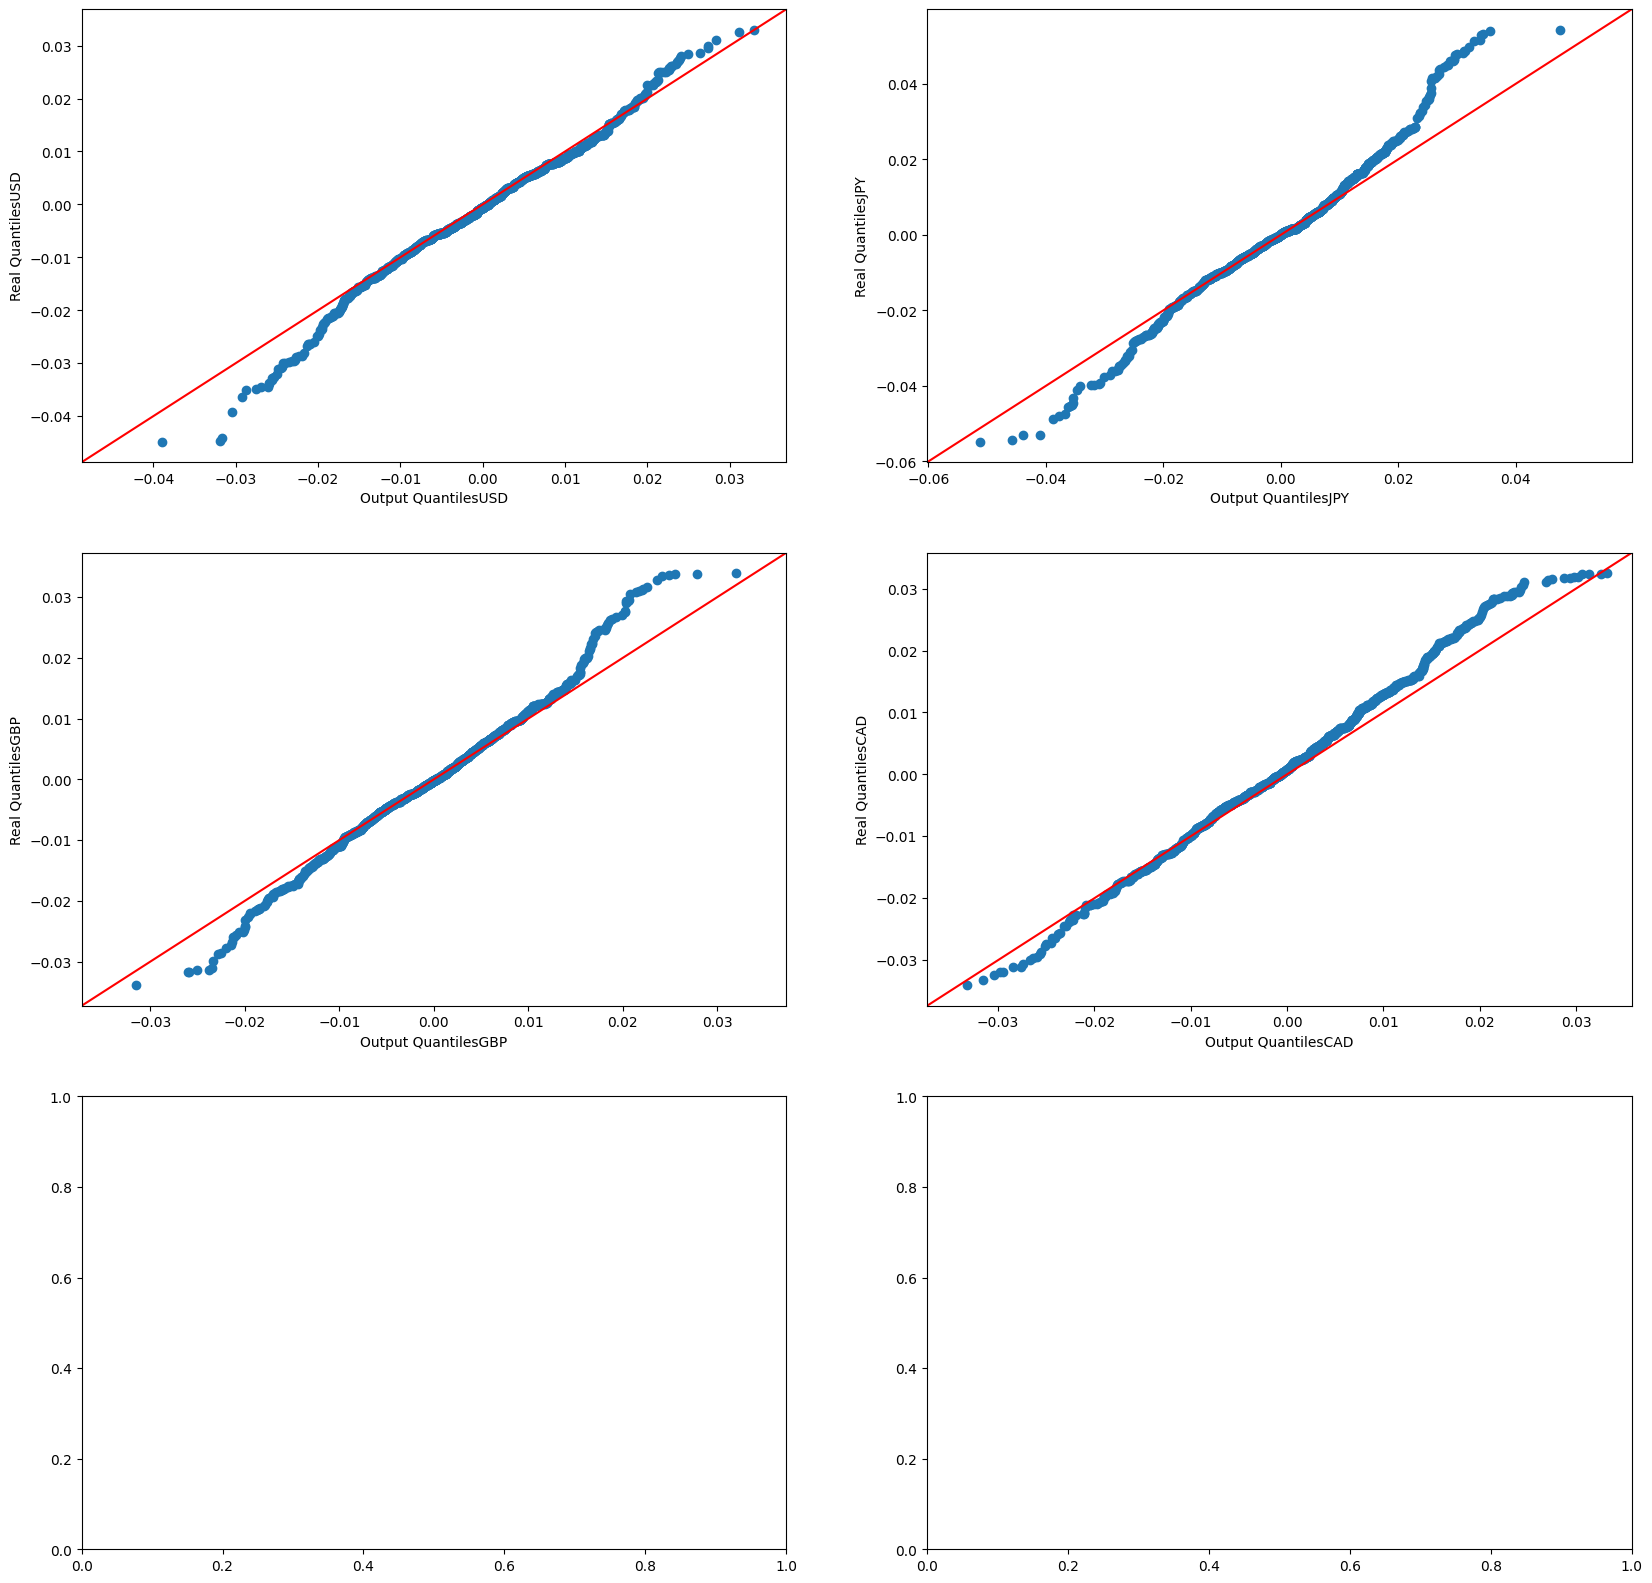

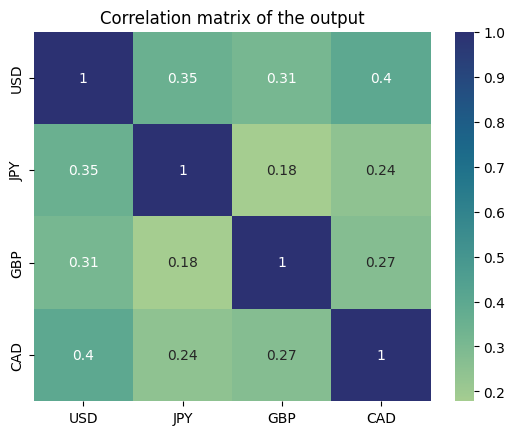

Correlation done
Train done


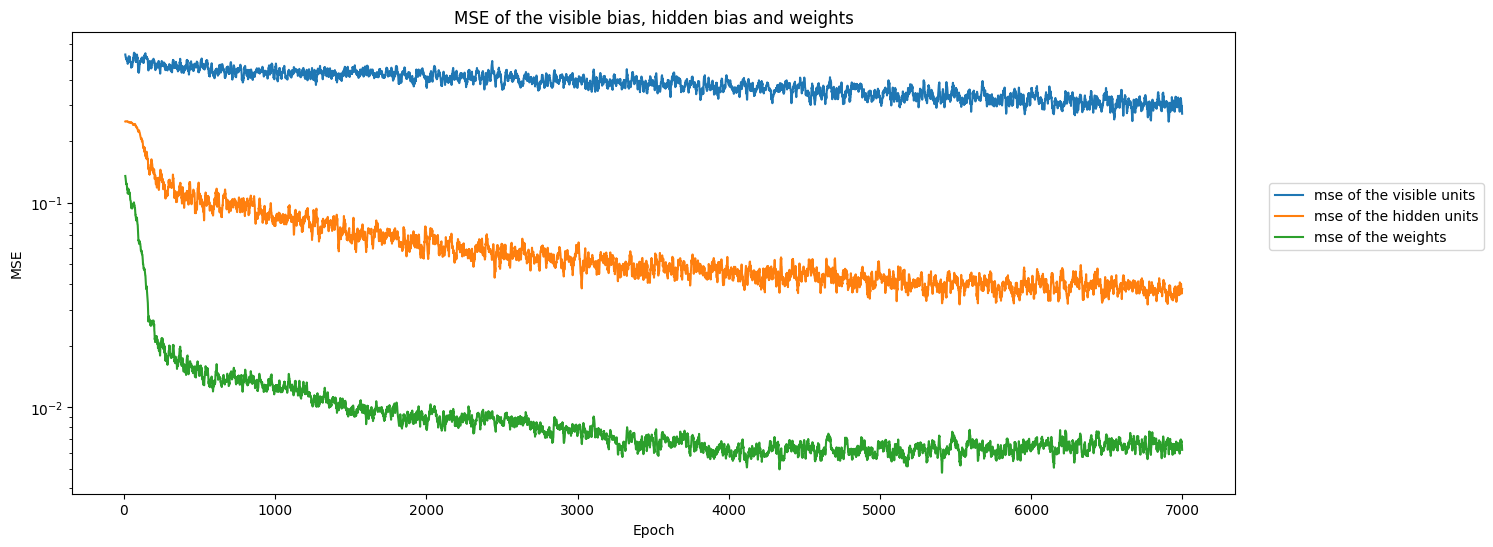

In [23]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 10
epochs = 7000
lr = 0.015
windows = 5
K = 500 # for the generation of sample
frequency = 'weekly'
ts.rbm_esg(scenarios, epochs, lr, K, test_dates, plot_from, windows, frequency=frequency, parallel=True)

### Monthly frequency

  0%|          | 7/7000 [00:00<01:43, 67.79it/s]

Pre-processing done


100%|██████████| 7000/7000 [01:20<00:00, 87.38it/s] 


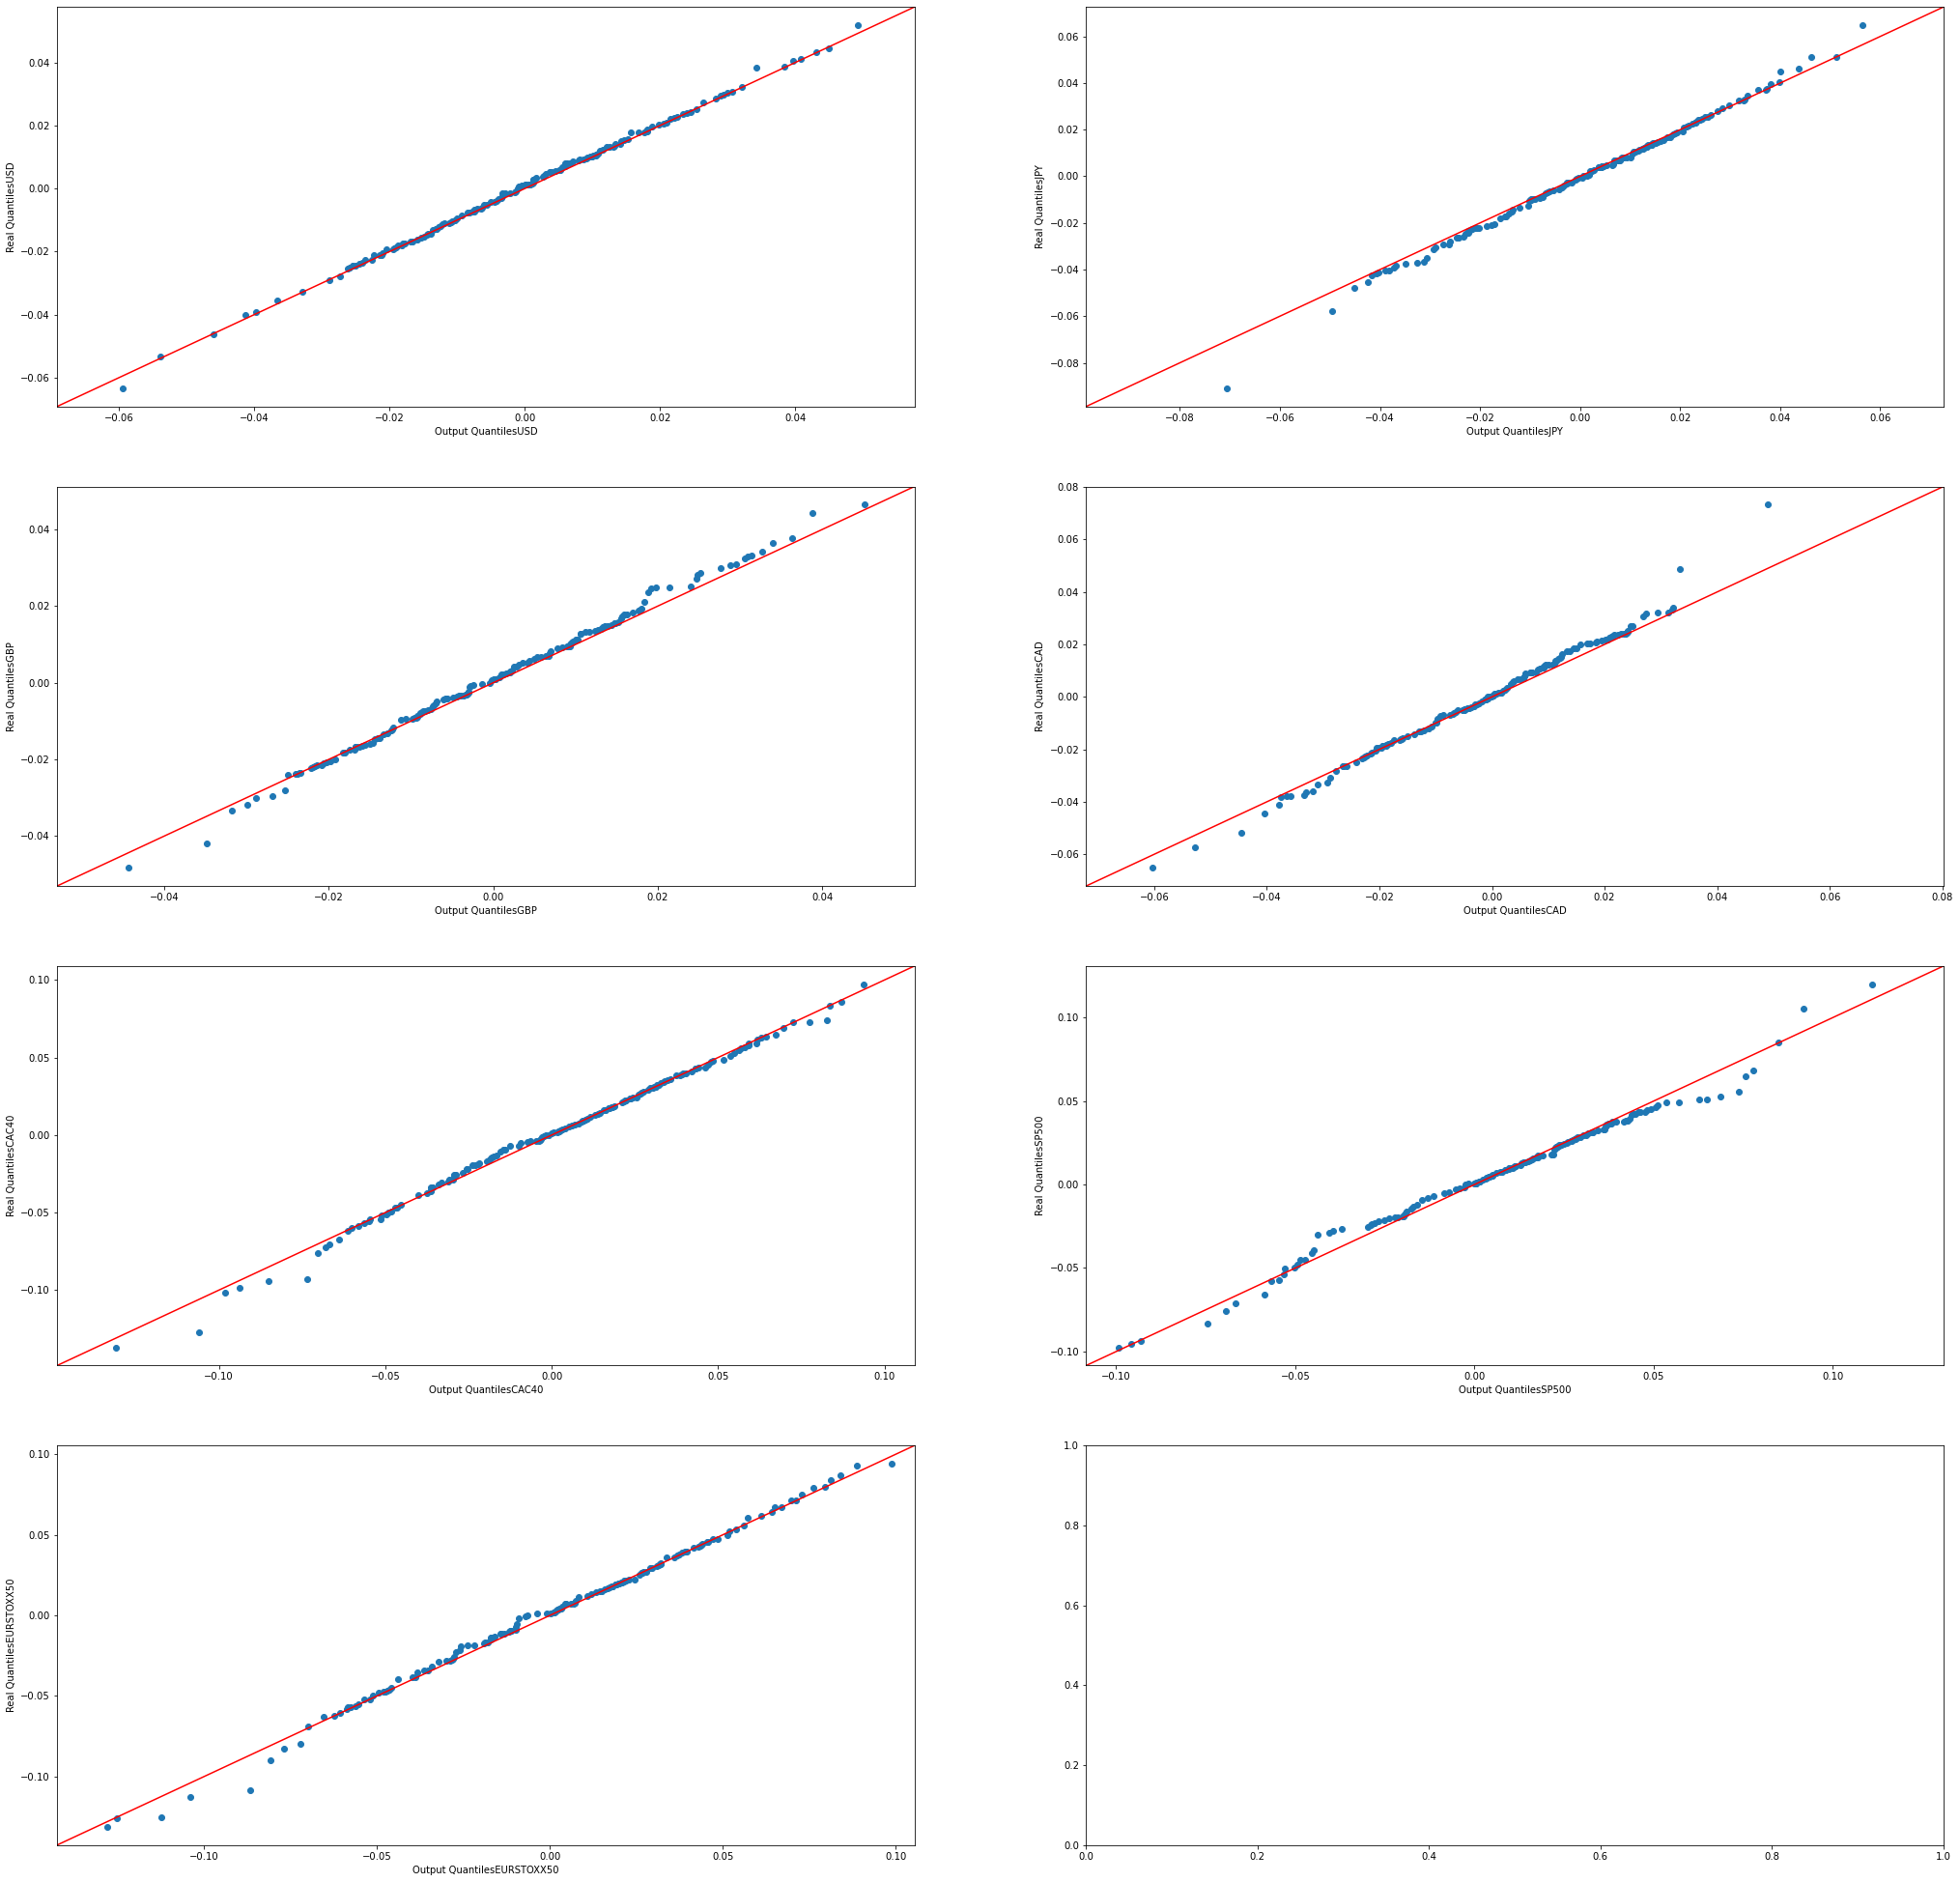

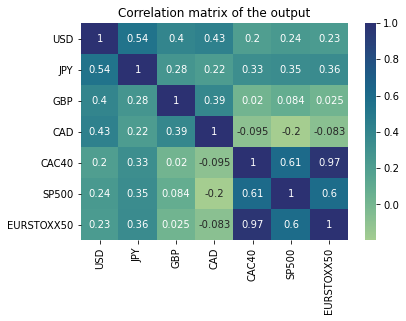

Correlation done
Train done


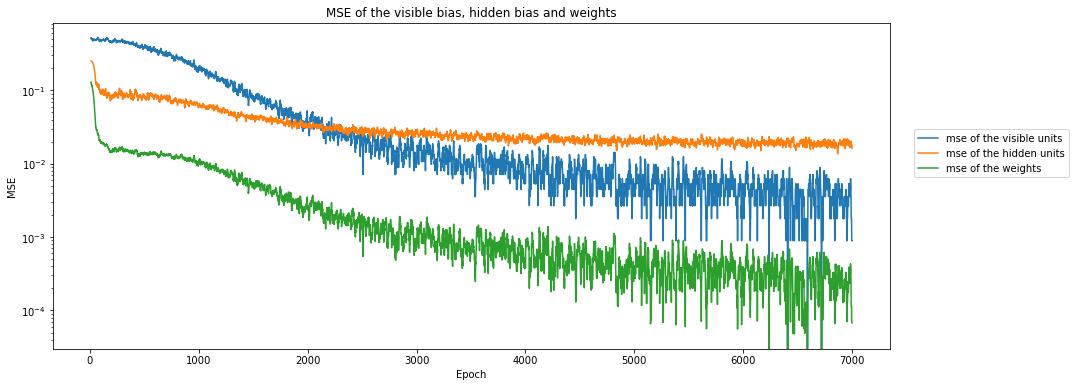

100%|██████████| 10/10 [02:05<00:00, 12.55s/it]


Time to generate the data: 125.5343279838562s


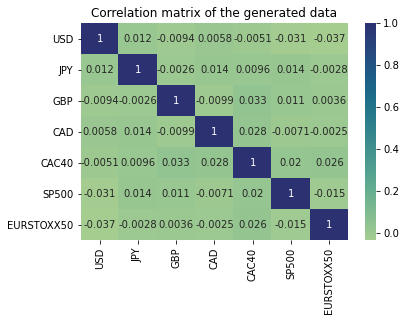

Correlation done
Quantiles done


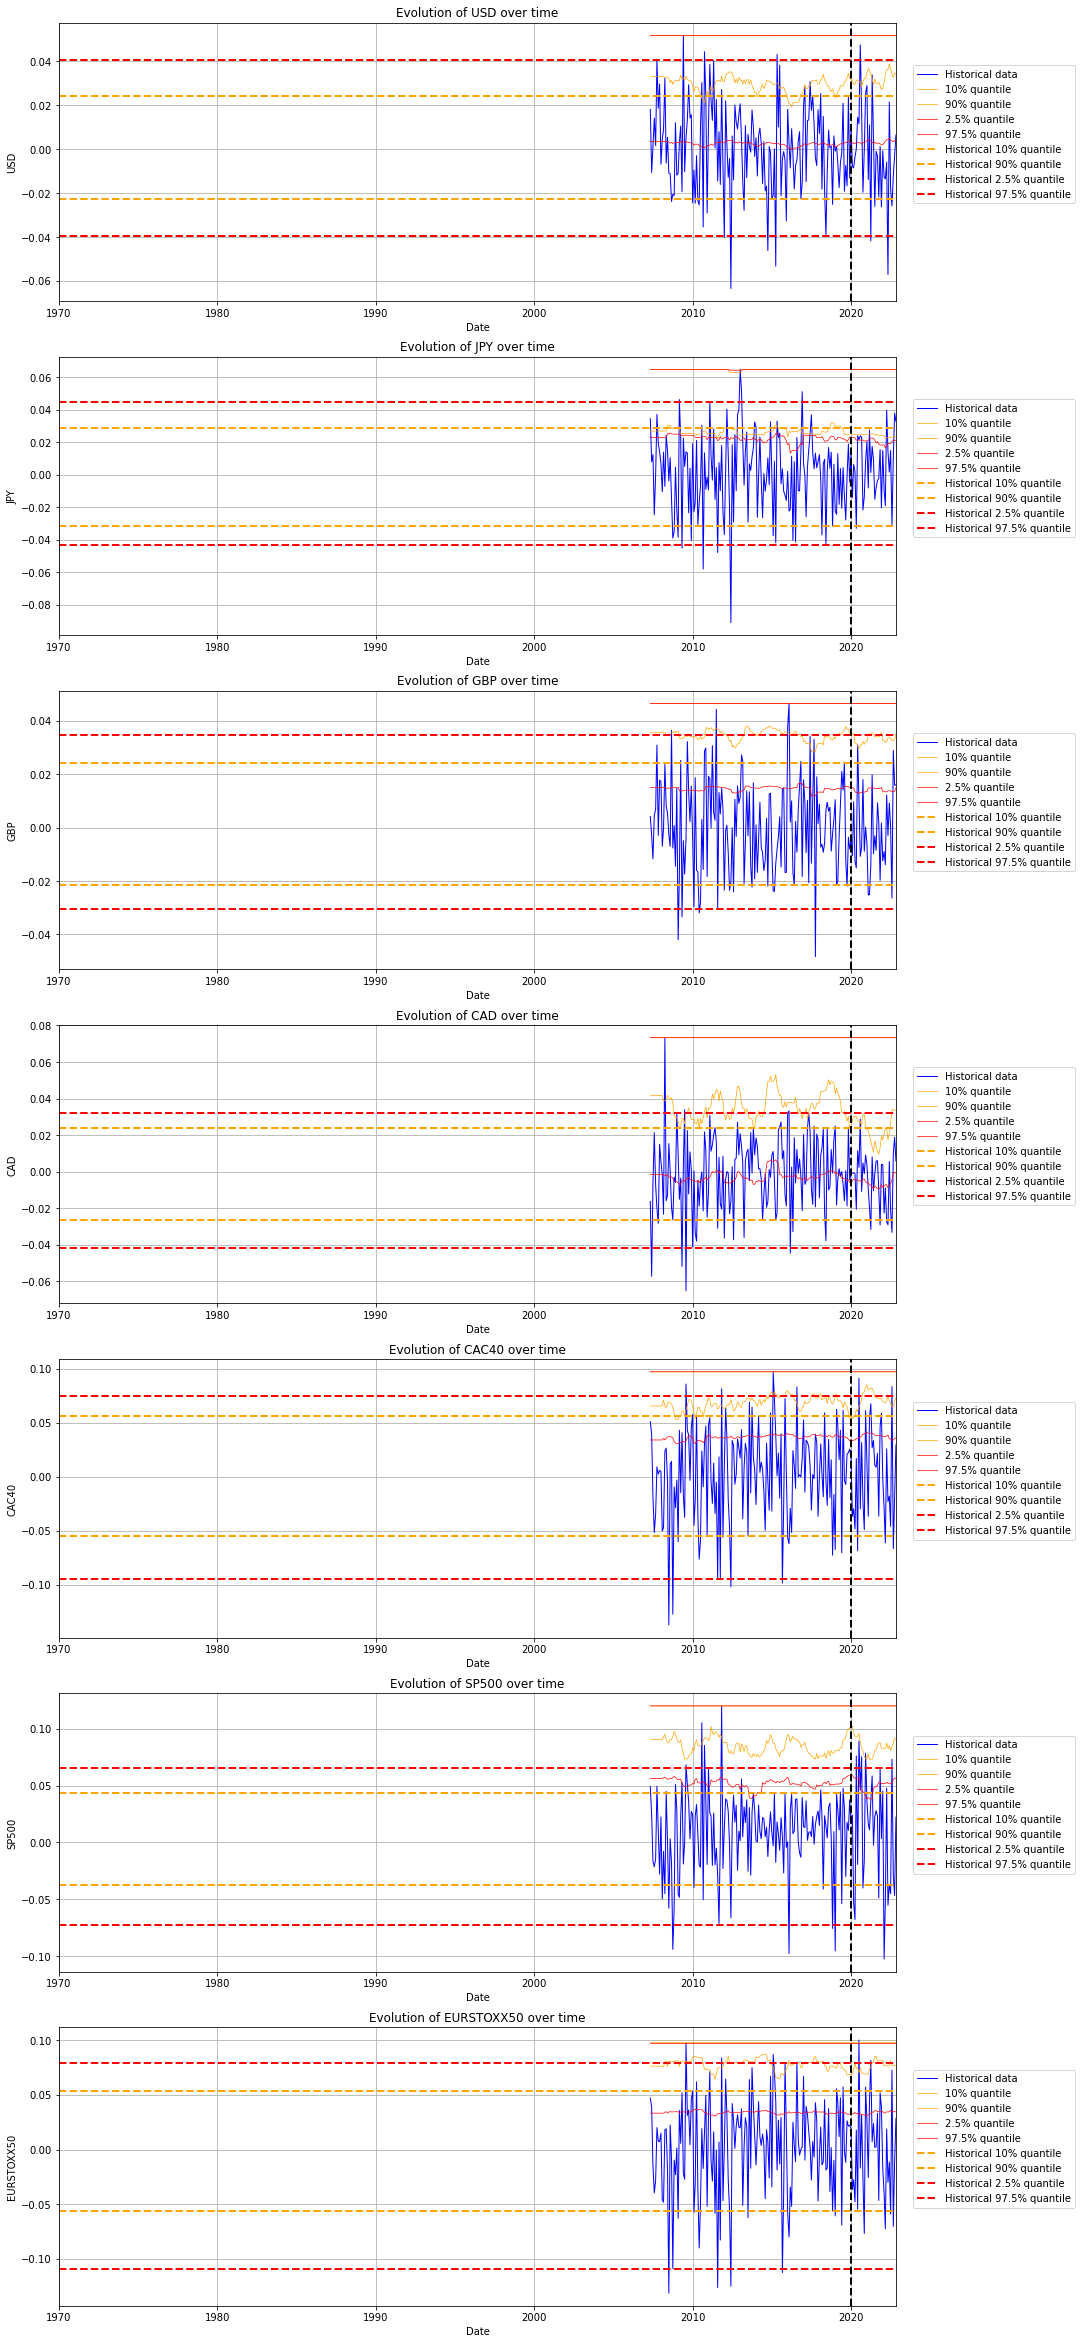

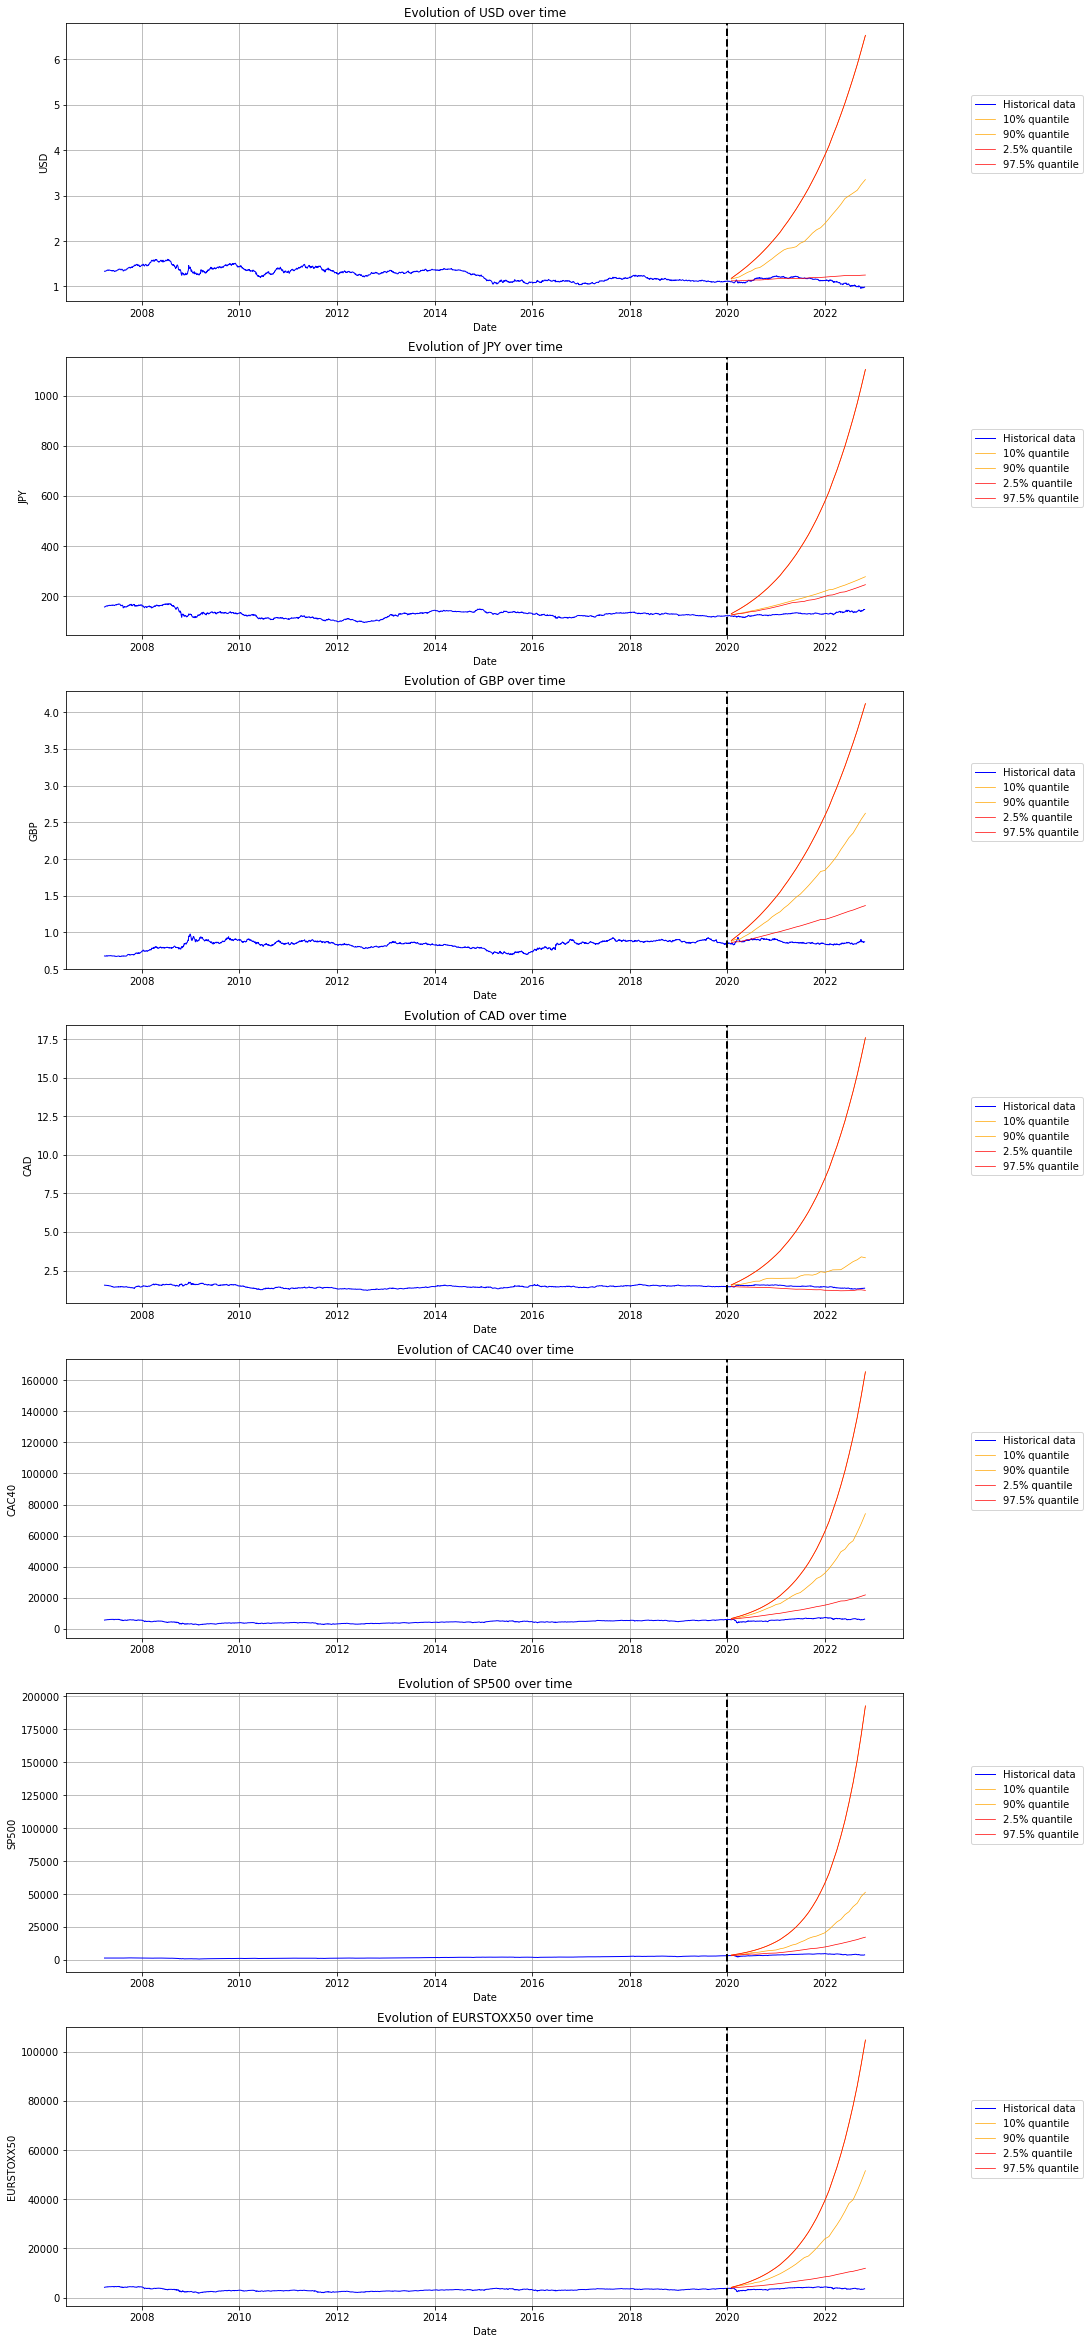

                 RBM
train      80.112563
generate  125.534328


In [14]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 10
epochs = 7000
lr = 0.015
windows = 5
K = 200 # for the generation of sample
frequency = 'monthly'
ts.rbm_esg(scenarios, epochs, lr, K, test_dates, plot_from, windows, frequency=frequency, parallel=False)

### Annualy frequency

Pre-processing done


100%|██████████| 7000/7000 [00:51<00:00, 136.81it/s]


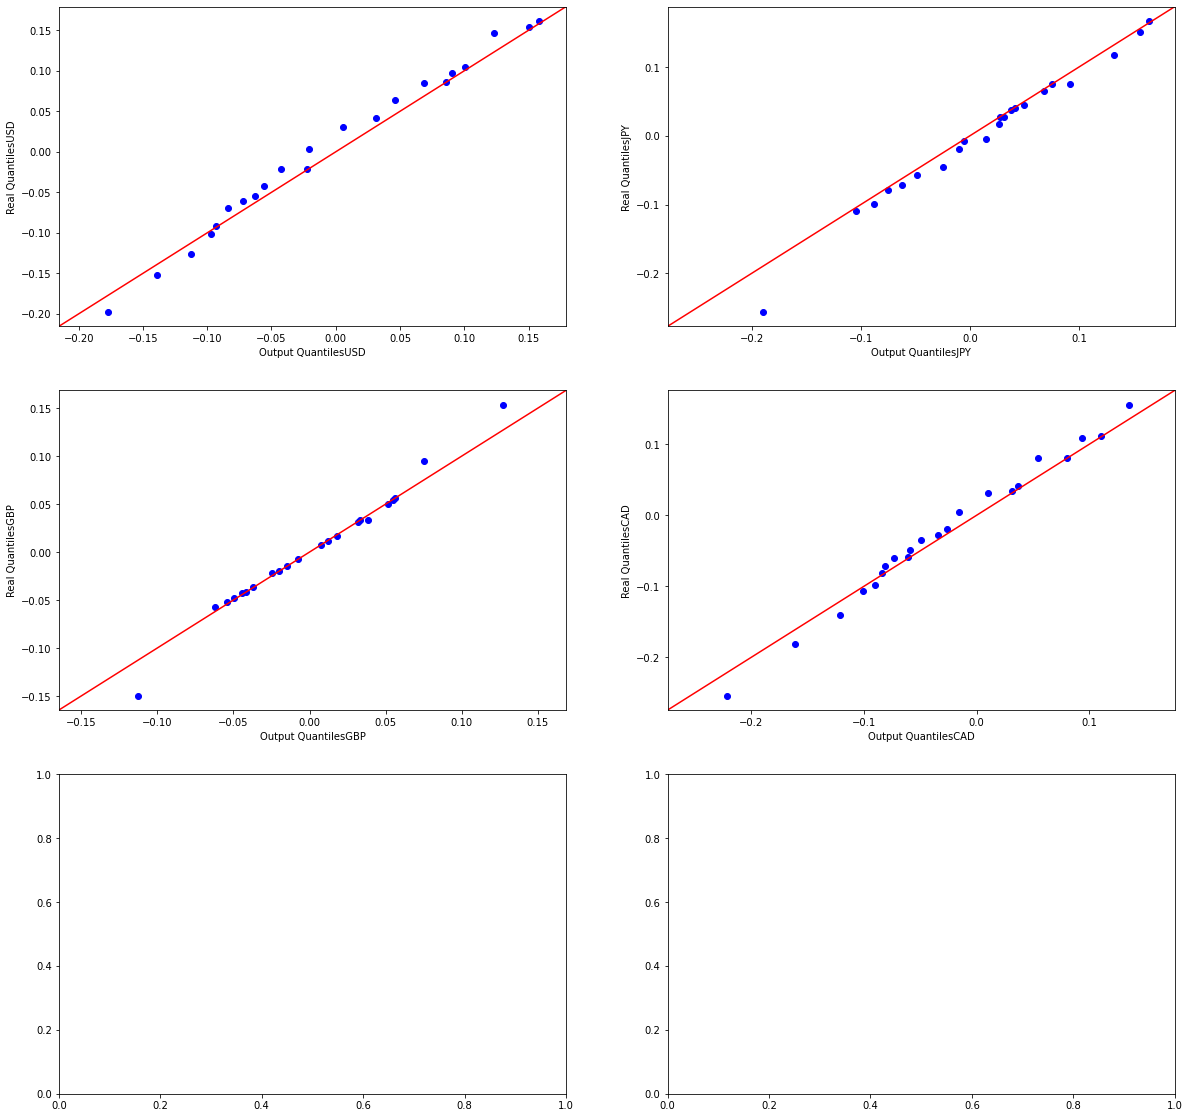

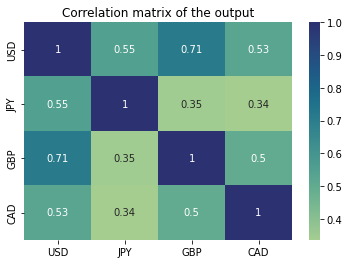

Correlation done
Train done


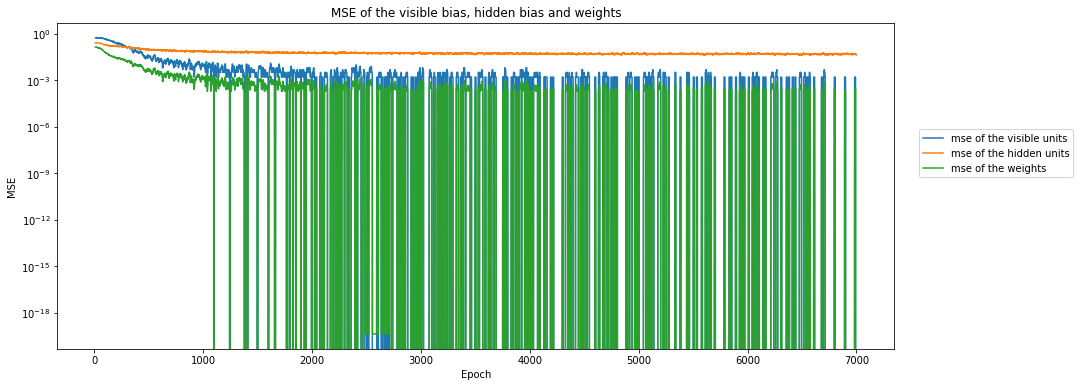

Time to generate the data: 36.95271372795105s


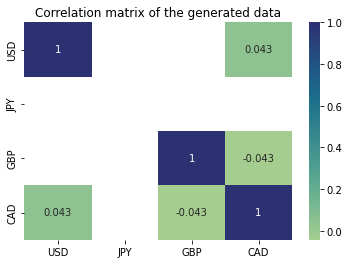

Correlation done
Quantiles done


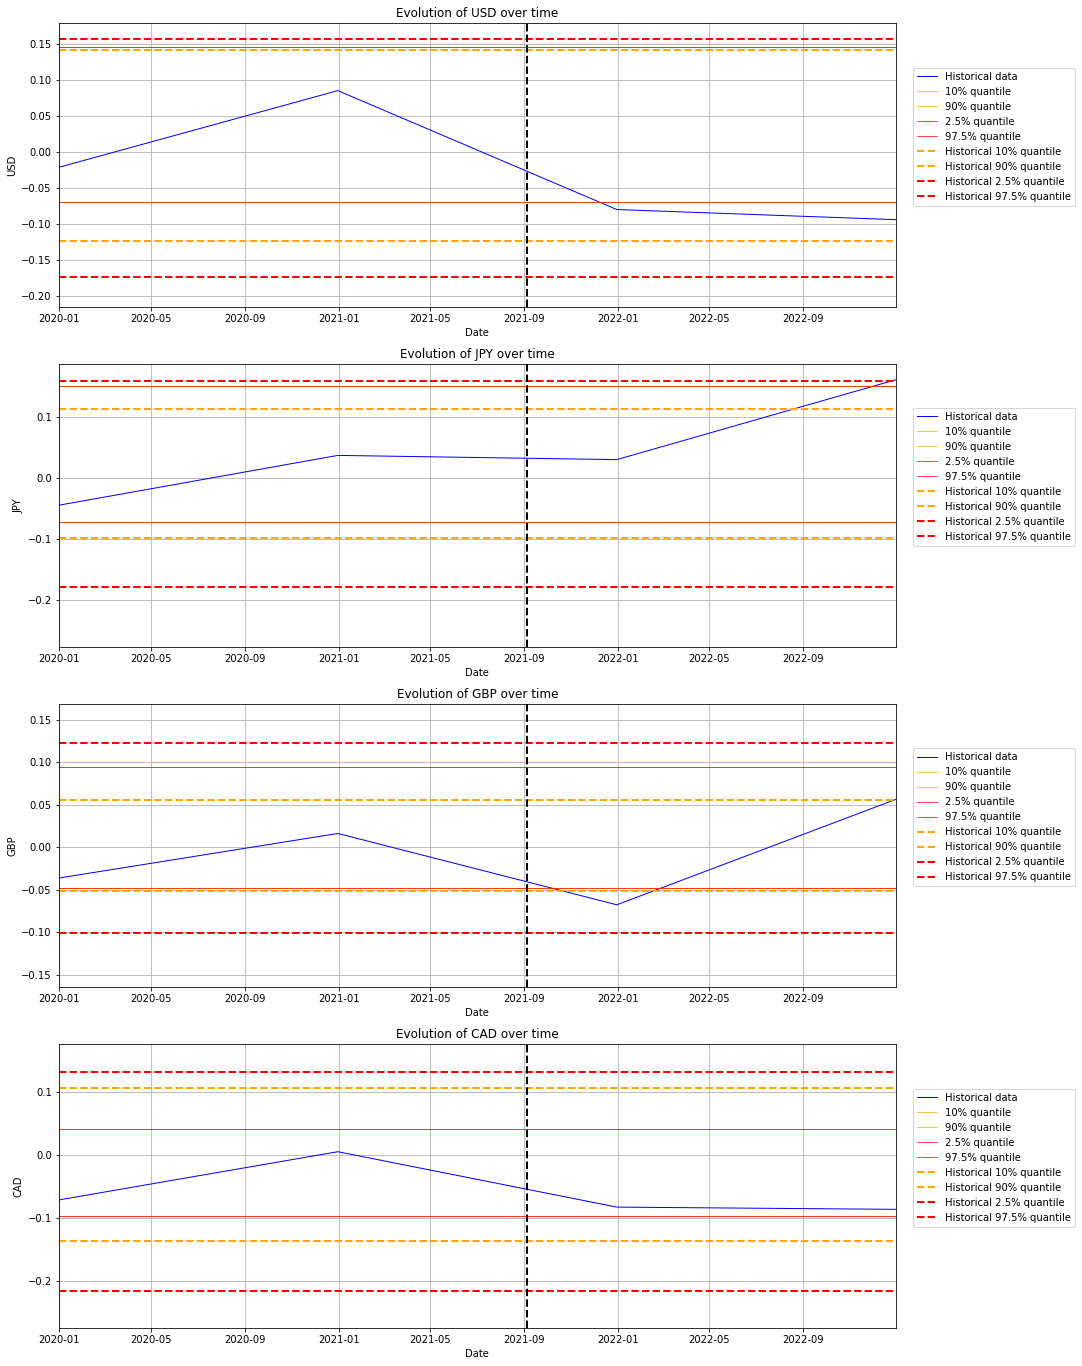

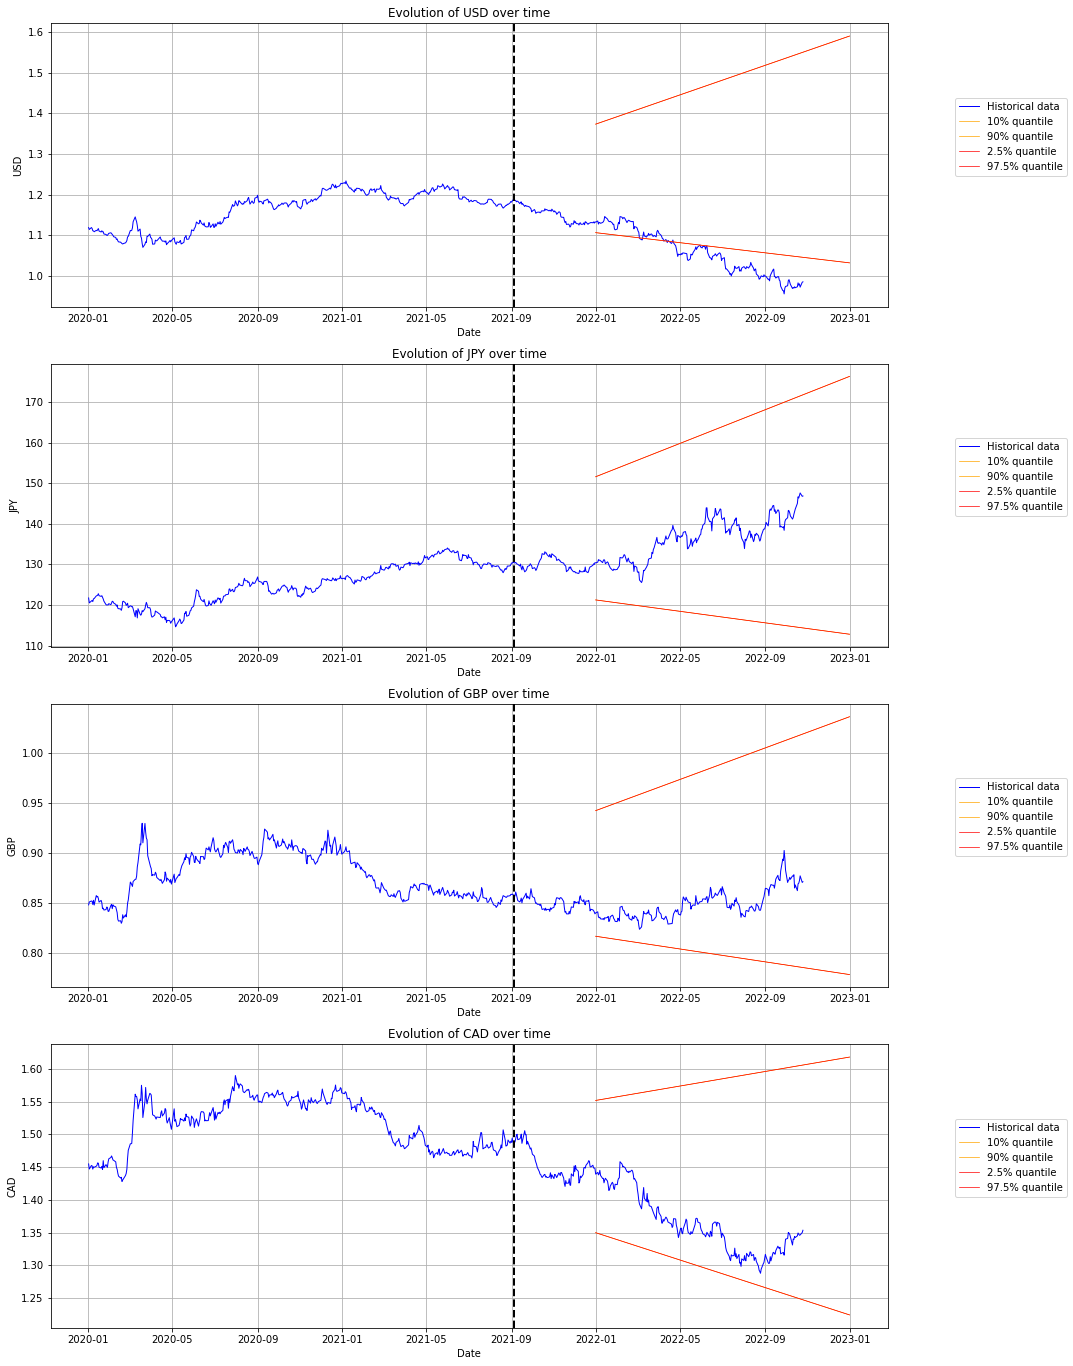

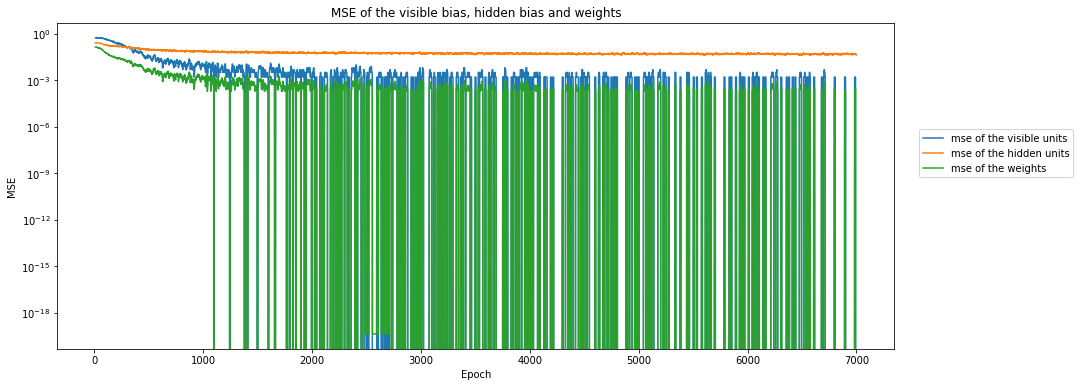

In [40]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 10
epochs = 7000
lr = 0.015
windows = 5
K = 500 # for the generation of sample
frequency = 'annualy'
ts.rbm_esg(scenarios, epochs, lr, K, test_dates, plot_from, windows, frequency=frequency, parallel=True)

# Performance

In [6]:
ts.performance()

Bootstrap         RBM
train     0.023403   47.017779
generate  0.048742  283.860014

## Numba's Performances

Let's show how fast is numba with an estimation of pi using a monte carlo method.

In [1]:
import random

def monte_carlo_pi(n):
    count = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x*x + y*y < 1:
            count += 1
    return 4 * count / n

%timeit monte_carlo_pi(1000000)

154 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


154 ms for the pi estimation using monte carlo **without numba**

In [2]:
import numba
import random

@numba.jit(nopython=True)
def monte_carlo_pi_numba(n):
    count = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x*x + y*y < 1:
            count += 1
    return 4 * count / n

%timeit monte_carlo_pi_numba(1000000)

7.18 ms ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


7.18 ms for the pi estimation using monte carlo **with numba**. Thus it is 21 times quicker **IN LOCAL**. We have almost the same result in Colab, with numba it is 25 times quicker.

![alternative text](./img/Numba.png)